# <h1>Thêm thư viện cần thiết</h1>

In [747]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px

import plotly.subplots as sp
import plotly.graph_objects as go

import numpy as np
import joblib
import torch
import random

from transformers import AutoModel, AutoTokenizer


# <h1>Load dữ liệu file</h1>

In [748]:
df = pd.read_excel('data/DataFinal/model/QH2022S-Luong-Ha.xlsx', header = 1)
df.describe()

,IDSV,CCCD,Phone,Maj,Province,ScID,GraYear,DTUT,PTXT,ScoTHPT1,...,K12_Ling,K12_Flang,K12_Phys,K12_Chem,K12_Bio,K12_Hist,K12_Geog,K12_AVG,Reason,Income
count,9.280000e+02,9.260000e+02,9.280000e+02,0.0,926.000000,926.000000,926.000000,174.000000,926.00000,908.000000,...,897.000000,891.000000,897.000000,897.000000,897.000000,897.000000,897.000000,900.000000,0.0,0.0
mean,2.200831e+07,2.008485e+10,6.692118e+08,NaN,13.976242,67.385529,2021.828294,1.235632,110.74946,7.924593,...,7.977703,7.771717,7.950910,7.987402,8.108138,8.292196,8.393311,8.254333,NaN,NaN
std,6.563862e+04,1.729995e+10,2.811013e+08,NaN,12.221358,70.410606,0.749557,1.029448,61.47743,1.142704,...,0.692268,0.925826,0.869891,0.857847,0.754577,0.776902,0.657172,0.508518,NaN,NaN
min,2.001093e+07,1.224473e+08,8.122120e+07,NaN,1.000000,1.000000,2003.000000,1.000000,100.00000,0.000000,...,0.800000,4.400000,2.666667,5.000000,5.200000,0.600000,5.500000,6.500000,NaN,NaN
25%,2.201023e+07,1.304027e+09,3.666099e+08,NaN,1.000000,20.000000,2022.000000,1.000000,100.00000,7.500000,...,7.600000,7.100000,7.400000,7.500000,7.700000,7.800000,8.000000,7.900000,NaN,NaN
50%,2.201046e+07,2.230400e+10,8.274398e+08,NaN,15.000000,50.000000,2022.000000,1.000000,100.00000,8.000000,...,8.000000,7.800000,8.000000,8.000000,8.100000,8.400000,8.400000,8.300000,NaN,NaN
75%,2.201070e+07,3.430400e+10,9.477958e+08,NaN,25.000000,94.000000,2022.000000,1.000000,100.00000,8.600000,...,8.400000,8.500000,8.500000,8.600000,8.600000,8.800000,8.900000,8.600000,NaN,NaN
max,2.201093e+07,2.313040e+11,9.898620e+08,NaN,63.000000,900.000000,2022.000000,6.000000,501.00000,9.750000,...,10.000000,9.900000,10.000000,10.000000,10.000000,10.000000,10.000000,9.800000,NaN,NaN


In [749]:
df.columns 

Index(['IDSV', 'SBD', 'CCCD', 'Name', 'Sex', 'DOB', 'ETH', 'POB', 'Phone',
       'Univ', 'Year', 'Maj', 'GrMaj', 'Province', 'ScID', 'ScName', 'GraYear',
       'LocProv', 'LocDist', 'LocWard', 'DTUT', 'KVUT', 'PTXT', 'PTXTname',
       'Hoc_luc', 'Hanh_kiem', 'To_hop', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3',
       'ScoTHPT', 'OrderNV', 'DGNL1', 'DGNL2', 'DGNL3', 'ScoDGNL', 'LangCert',
       'TBC_Y1', 'TBC_Y2', 'TBC_Y3', 'TB_HK1', 'CN1', 'CN2', 'CN3', 'CN4',
       'CN5', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem',
       'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG', 'Habit', 'Reason',
       'Sub_favor', 'Income', 'Fjob', 'Mjob'],
      dtype='object')

In [750]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 61 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDSV       928 non-null    int64  
 1   SBD        928 non-null    object 
 2   CCCD       926 non-null    float64
 3   Name       928 non-null    object 
 4   Sex        928 non-null    object 
 5   DOB        928 non-null    object 
 6   ETH        926 non-null    object 
 7   POB        928 non-null    object 
 8   Phone      928 non-null    int64  
 9   Univ       928 non-null    object 
 10  Year       928 non-null    object 
 11  Maj        0 non-null      float64
 12  GrMaj      928 non-null    object 
 13  Province   926 non-null    float64
 14  ScID       926 non-null    float64
 15  ScName     926 non-null    object 
 16  GraYear    926 non-null    float64
 17  LocProv    926 non-null    object 
 18  LocDist    926 non-null    object 
 19  LocWard    286 non-null    object 
 20  DTUT      

- **IDSV**: Mã sinh viên.
- **SBD**: Số báo danh của sinh viên.
- **CCCD**: Số căn cước công dân của sinh viên.
- **Name**: Tên của sinh viên.
- **Sex**: Giới tính của sinh viên.
- **DOB**: Ngày sinh của sinh viên.
- **ETH**: Dân tộc của sinh viên.
- **POB**: Nơi sinh của sinh viên.
- **Phone**: Số điện thoại của sinh viên.
- **Univ**: Trường đại học mà sinh viên đang theo học.
- **Year**: Năm học hiện tại của sinh viên.
- **Maj**: Mã ngành học của sinh viên.
- **GrMaj**: Mã ngành học cụ thể (nếu có).
- **Province**: Mã tỉnh của sinh viên.
- **ScID**: Mã trường trung học phổ thông (THPT) của sinh viên.
- **ScName**: Tên trường THPT của sinh viên.
- **GraYear**: Năm tốt nghiệp THPT của sinh viên.
- **LocProv**: Tỉnh nơi sinh viên đăng ký hộ khẩu thường trú.
- **LocDist**: Quận/huyện nơi sinh viên đăng ký hộ khẩu thường trú.
- **LocWard**: Phường/xã nơi sinh viên đăng ký hộ khẩu thường trú.
- **DTUT**: Mã diện ưu tiên tuyển sinh của sinh viên (nếu có).
- **KVUT**: Mã khu vực ưu tiên tuyển sinh của sinh viên.
- **PTXT**: Mã phương thức xét tuyển vào đại học.
- **PTXTname**: Tên phương thức xét tuyển vào đại học.
- **Hoc_luc**: Học lực của sinh viên trong THPT.
- **Hanh_kiem**: Hạnh kiểm của sinh viên trong THPT.
- **To_hop**: Tổ hợp môn xét tuyển đại học.
- **ScoTHPT1**, **ScoTHPT2**, **ScoTHPT3**: Điểm của các môn trong tổ hợp xét tuyển đại học.
- **ScoTHPT**: Tổng điểm của các môn trong tổ hợp xét tuyển đại học.
- **OrderNV**: Số thứ tự nguyện vọng xét tuyển.
- **DGNL1**, **DGNL2**, **DGNL3**: Điểm các môn trong kỳ thi đánh giá năng lực (nếu có).
- **ScoDGNL**: Tổng điểm đánh giá năng lực.
- **LangCert**: Chứng chỉ ngoại ngữ (nếu có).
- **TBC_Y1**, **TBC_Y2**, **TBC_Y3**: Điểm trung bình chung các năm học 1, 2, 3 đại học.
- **TB_HK1**: Điểm trung bình học kỳ 1.
- **CN1**, **CN2**, **CN3**, **CN4**, **CN5**: Điểm các môn học năm thứ nhất đại học.
- **K12_Math**, **K12_Ling**, **K12_Flang**, **K12_Phys**, **K12_Chem**, **K12_Bio**, **K12_Hist**, **K12_Geog**, **K12_AVG**: Điểm các môn học lớp 12 và điểm trung bình lớp 12.
- **Habit**: Sở thích cá nhân của sinh viên.
- **Reason**: Lý do lựa chọn ngành học.
- **Sub_favor**: Môn học yêu thích.
- **Income**: Thu nhập của gia đình sinh viên.
- **Fjob**: Nghề nghiệp của cha sinh viên.
- **Mjob**: Nghề nghiệp của mẹ sinh viên.


In [751]:
def remove_rows_with_high_nan(df, threshold=0.5):
    # Thay thế các giá trị 'None' và 'nan' bằng np.nan
    df.replace(['None', 'nan', 'NaN', ' ',''], np.nan, inplace=True)
    
    # Tính tỷ lệ NaN trên mỗi hàng
    nan_ratio = df.isna().mean(axis=1)
    
    # Lọc các hàng có tỷ lệ NaN lớn hơn hoặc bằng ngưỡng
    filtered_df = df[nan_ratio < threshold]
    
    return filtered_df

In [752]:
df = remove_rows_with_high_nan(df)

In [753]:
#gom những cột có ý nghĩa với nhau lại:

# Tạo cột mới lưu giá trị của IDSV và SBD
df['Info_SV'] = df['IDSV'].astype(str) + '_' + df['SBD'].astype(str) + '_' + df['CCCD'].astype(str)+ '_' + df['DOB'].astype(str)+ '_' + df['Name'].astype(str)+ '_' + df['Phone'].astype(str)

df['highschool'] = df['ScID'].astype(str) + '_' + df['ScName'].astype(str)


# Xóa các cột không cần thiết cho dự đoán
df = df.drop(columns=['IDSV', 'SBD','CCCD','DOB','Name','Phone','ScName','ScID' ], errors='ignore')

In [754]:
def show_infor_dataframe(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values:")
        print(unique_values)
        print("\n")

In [755]:
show_infor_dataframe(df)

Column 'Sex' has 2 unique values:
['Nam' 'Nữ']


Column 'ETH' has 14 unique values:
['Kinh' 'Tày' 'Mường' 'Nùng' 'Khơmú' 'Dao' 'Thái' 'Sán Dìu' 'Hoa' 'Thổ'
 'Lào' 'Hmông' 'Kháng' 'Hà Nhì']


Column 'POB' has 39 unique values:
['HÀ NỘI' 'HÀ TÂY' 'VĨNH PHÚC' 'HẢI PHÒNG' 'TUYÊN QUANG' 'NINH BÌNH'
 'GIA LAI' 'NAM ĐỊNH' 'THANH HÓA' 'THÁI BÌNH' 'BẮC NINH' 'HÒA BÌNH'
 'NGHỆ AN' 'HÀ GIANG' 'HƯNG YÊN' 'PHÚ THỌ' 'HẢI DƯƠNG' 'HÀ NAM' 'SƠN LA'
 'TP HỒ CHÍ MINH' 'HÀ TĨNH' 'QUẢNG NINH' 'THÁI NGUYÊN' 'KON TUM'
 'BẮC GIANG' 'ĐIỆN BIÊN' 'LẠNG SƠN' 'BẮC KẠN' 'BÌNH DƯƠNG' 'CAO BẰNG'
 'YÊN BÁI' 'CẦN THƠ' 'ĐẮK LẮK' 'LAI CHÂU' 'LIÊN BANG NGA' 'HOÀ BÌNH'
 'THANH HOÁ' 'BÀ RỊA VŨNG TÀU' 'LÀO CAI']


Column 'Univ' has 1 unique values:
['Trường Đại học Giáo dục']


Column 'Year' has 1 unique values:
['QHS2022']


Column 'Maj' has 1 unique values:
[nan]


Column 'GrMaj' has 19 unique values:
['GD1.N1' 'GD1.N2' 'GD2.N1' 'GD2.N2' 'GD3.N1' 'GD3.N2' 'GD3.N3' 'GD3.N4'
 'GD3.N5' 'GD3.N6' 'GD3.N7' 'GD3.N8' 'GD3.N9' 'GD3

In [756]:
#xóa những cột không cần thiết vì chỉ có 1 giá trị
df = df.drop(columns=['Univ', 'Year'], errors='ignore')
#xóa những cột không cần thiết vì đã có cột đại diện cho ý nghĩa của cột đã xóa
df = df.drop(columns=['OrderNV','POB', 'Province', 'LocProv','LocDist', 'Info_SV','highschool' ], errors='ignore')

In [757]:
def display_column_info(df):
    for column in df.columns:
        # Kiểu dữ liệu của cột
        col_type = df[column].dtype
        
        # Số lượng giá trị không bị thiếu
        non_null_count = df[column].notna().sum()
        
        # Tổng số giá trị
        total_count = len(df[column])
        
        # Tính số lượng và tỷ lệ phần trăm giá trị thiếu
        missing_count = total_count - non_null_count
        missing_percentage = (missing_count / total_count) * 100
        
        
        print(f"Column: {column}")
        print(f"  Data Type: {col_type}")
        print(f"  Non-null Count: {non_null_count}")
        print(f"  Total Count: {total_count}")
        print(f"  Missing Values Count: {missing_count}")
        print(f"  Missing Values Percentage: {missing_percentage:.2f}%")
        print()
        # Kiểm tra xem tỷ lệ giá trị thiếu có cao không
        if missing_percentage >= 50:
            print(f"  Column {column} có {missing_percentage:.2f}% giá trị bị thiếu nhiều, cần xóa")
        print()
        print()

In [758]:
display_column_info(df)

Column: Sex
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Maj
  Data Type: float64
  Non-null Count: 0
  Total Count: 926
  Missing Values Count: 926
  Missing Values Percentage: 100.00%

  Column Maj có 100.00% giá trị bị thiếu nhiều, cần xóa


Column: GrMaj
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: LocWard
  Data Type: object
  Non-null Count: 286
  Total Count: 926
  Missing Values Count: 640
  Missing Values Percentage: 69.11%

  Column LocWard có 69.11% giá trị bị thiếu nhiều, cần xóa


Column: DTUT
  Data Type: float64
  Non-null C

In [759]:
#xóa những cột thiếu dữ liệu nhiều
df = df.drop(columns=['Maj', 'LocWard','DTUT','DGNL1','DGNL2','DGNL3','ScoDGNL','LangCert',
                      'TBC_Y1','TBC_Y2','TBC_Y3','CN3','CN4', 'CN5','Reason','Sub_favor',
                      'Income' ], errors='ignore')

In [760]:
display_column_info(df)

Column: Sex
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GrMaj
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXT
  Data Type: float64
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: object
  Non-null Count: 926
  Total Count: 926
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Typ

In [761]:
# Lọc các hàng có giá trị 'Hoc_luc' là NaN
null_hoc_luc_df = df[df['Hoc_luc'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị học lực là NaN:")
    print(null_hoc_luc_df[['Hoc_luc', 'Hanh_kiem', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT','K12_Math','K12_Ling', 'K12_Phys','K12_AVG']])  # Sửa phần này
else:
    print("Không có dữ liệu nào có giá trị học lực là NaN.")


Dữ liệu có giá trị học lực là NaN:
    Hoc_luc Hanh_kiem  ScoTHPT1  ScoTHPT2  ScoTHPT3  ScoTHPT  K12_Math  \
149     NaN       NaN       NaN       NaN       NaN    30.00       6.8   
153     NaN       NaN       NaN       NaN       NaN    30.00       7.1   
154     NaN       NaN       NaN       NaN       NaN    30.00       6.7   
156     NaN       NaN       NaN       NaN       NaN    30.00       8.2   
174     NaN       NaN      8.75      8.75      8.25    28.50       6.6   
205     NaN       NaN      7.75      9.75      9.00    29.25       8.5   
341     NaN       NaN      7.75      7.00      7.50    24.50       8.3   
614     NaN       NaN      8.50      6.75      8.25    26.25       8.4   
673     NaN       NaN      7.00      7.25      8.25    25.25       8.0   
777     NaN       NaN       NaN       NaN       NaN    30.00       7.5   
778     NaN       NaN      8.75      9.50      8.00    29.00       7.6   
791     NaN       NaN      9.00     10.00      9.50    31.25       7.1   
799

In [762]:
def remove_rows_with_specific_values(df):
    # Thay thế các giá trị 'None' và 'nan' bằng np.nan
    df.replace(['None', 'nan', 'NaN'], np.nan, inplace=True)
    
    # Điều kiện kiểm tra dòng có giá trị NaN trong các cột cụ thể
    condition_nan_columns = df[['Hoc_luc', 'Hanh_kiem', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3']].isna().all(axis=1)
    
    # Điều kiện kiểm tra giá trị cụ thể trong cột 'ScoTHPT'
    condition_specific_value = df['ScoTHPT'] == 30.00
    
    # Kết hợp các điều kiện để lọc các dòng cần xóa
    rows_to_remove = condition_nan_columns & condition_specific_value
    # Xóa các dòng dữ liệu phù hợp
    df_cleaned = df[~rows_to_remove]
    
    return df_cleaned

In [763]:
df= remove_rows_with_specific_values(df)

In [764]:
df.columns

Index(['Sex', 'ETH', 'GrMaj', 'GraYear', 'KVUT', 'PTXT', 'PTXTname', 'Hoc_luc',
       'Hanh_kiem', 'To_hop', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT',
       'TB_HK1', 'CN1', 'CN2', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys',
       'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG', 'Habit',
       'Fjob', 'Mjob'],
      dtype='object')

In [765]:
display_column_info(df)

Column: Sex
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GrMaj
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXT
  Data Type: float64
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: object
  Non-null Count: 916
  Total Count: 916
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Typ

In [766]:
# Lọc các hàng có giá trị 'Hoc_luc' là NaN
null_hoc_luc_df = df[df['Hoc_luc'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị học lực là NaN:")
    print(null_hoc_luc_df[['Hoc_luc', 'Hanh_kiem', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT','K12_Math','K12_Ling', 'K12_Phys','K12_AVG']])  # Sửa phần này
else:
    print("Không có dữ liệu nào có giá trị học lực là NaN.")

Dữ liệu có giá trị học lực là NaN:
    Hoc_luc Hanh_kiem  ScoTHPT1  ScoTHPT2  ScoTHPT3  ScoTHPT  K12_Math  \
174     NaN       NaN      8.75      8.75      8.25    28.50       6.6   
205     NaN       NaN      7.75      9.75      9.00    29.25       8.5   
341     NaN       NaN      7.75      7.00      7.50    24.50       8.3   
614     NaN       NaN      8.50      6.75      8.25    26.25       8.4   
673     NaN       NaN      7.00      7.25      8.25    25.25       8.0   
778     NaN       NaN      8.75      9.50      8.00    29.00       7.6   
791     NaN       NaN      9.00     10.00      9.50    31.25       7.1   
802     NaN       NaN      8.50      9.00      8.50    28.75       7.2   
807     NaN       NaN      8.50      8.75      9.75    29.75       NaN   
818     NaN       NaN      7.50      9.75      9.00    29.00       8.0   
825     NaN       NaN      8.00      9.00      9.00    28.75       7.0   
827     NaN       NaN      8.25     10.00      8.75    29.75       7.7   
836

In [767]:
def count_rows_with_text(df, column_name, text):
    # Kiểm tra sự tồn tại của chuỗi trong cột và tính số lượng dòng
    count = df[column_name].str.contains(text, na=False).sum()
    return count

In [768]:
count = count_rows_with_text(df, 'PTXTname', 'ĐGNL')
print(f"Số lượng dòng chứa '{'ĐGNL'}' trong cột 'PTXTname': {count}")

count1 = count_rows_with_text(df, 'PTXTname', 'TN THPT')
print(f"Số lượng dòng chứa '{'TN THPT'}' trong cột 'PTXTname': {count1}")


Số lượng dòng chứa 'ĐGNL' trong cột 'PTXTname': 6
Số lượng dòng chứa 'TN THPT' trong cột 'PTXTname': 909


In [769]:
# Lọc các hàng có giá trị 'ScoTHPT' là NaN
null_hoc_luc_df = df[df['ScoTHPT'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị ScoTHPT là NaN:")
    print(null_hoc_luc_df[['ScoTHPT', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'PTXT','PTXTname','TB_HK1', 'K12_Math']])
else:
    print("Không có dữ liệu nào có giá trị ScoTHPT là NaN.")

Dữ liệu có giá trị ScoTHPT là NaN:
     ScoTHPT  ScoTHPT1  ScoTHPT2  ScoTHPT3   PTXT PTXTname  TB_HK1  K12_Math
15       NaN       NaN       NaN       NaN  401.0     ĐGNL    2.86       8.9
39       NaN       NaN       NaN       NaN  401.0     ĐGNL    2.67       9.7
98       NaN       NaN       NaN       NaN  401.0     ĐGNL    2.79       9.0
127      NaN       NaN       NaN       NaN  401.0     ĐGNL    3.11       9.1
129      NaN       NaN       NaN       NaN  401.0     ĐGNL    2.78       9.4
346      NaN       NaN       NaN       NaN  401.0  TN THPT    2.75       9.1
483      NaN       NaN       NaN       NaN  401.0  TN THPT    2.57       7.2
851      NaN       NaN       NaN       NaN  401.0     ĐGNL    3.70       9.8


In [770]:
# Điều kiện kiểm tra dòng có giá trị NaN trong các cột cụ thể
condition_nan_columns = df[['ScoTHPT', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3']].isna().all(axis=1)

# Điều kiện kiểm tra giá trị cụ thể trong cột 'PTXT'
condition_specific_value = df['PTXT'] == 401.0

# Kết hợp các điều kiện để lọc các dòng cần xóa
rows_to_remove = condition_nan_columns & condition_specific_value
# Xóa các dòng dữ liệu phù hợp
df = df[~rows_to_remove]

In [771]:
display_column_info(df)

Column: Sex
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GrMaj
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXT
  Data Type: float64
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: object
  Non-null Count: 908
  Total Count: 908
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Typ

In [772]:
# Lọc các hàng có giá trị 'K12_AVG' là NaN
null_hoc_luc_df = df[df['K12_AVG'].isna()]

# In ra thông tin của các dòng dữ liệu
if not null_hoc_luc_df.empty:
    print("Dữ liệu có giá trị K12_AVG là NaN:")
    print(null_hoc_luc_df[['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 
                           'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']])
else:
    print("Không có dữ liệu nào có giá trị K12_AVG là NaN.")

Dữ liệu có giá trị K12_AVG là NaN:
     K12_Math  K12_Ling  K12_Flang  K12_Phys  K12_Chem  K12_Bio  K12_Hist  \
70        NaN       NaN        NaN       NaN       NaN      NaN       NaN   
219       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
265       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
275       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
315       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
321       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
337       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
339       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
375       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
394       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
491       NaN       NaN        NaN       NaN       NaN      NaN       NaN   
513       NaN       NaN        NaN       

In [773]:
# Điều kiện kiểm tra dòng có giá trị NaN trong các cột cụ thể
condition_nan_columns = df[['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']].isna().all(axis=1)
# Xóa các dòng dữ liệu phù hợp
df = df[~condition_nan_columns]

In [774]:
k12_columns = ['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']

# Điền vào giá trị còn thiếu bằng giá trị trung bình của cột
for col in k12_columns:
    if col in df.columns:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

C:\Users\vongu\AppData\Local\Temp\ipykernel_15840\162960753.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# <h1>Chuyển hóa số liệu</h1>

**ta chuyển hóa dữ liệu về dạng số để thực hiện trực quan hóa số liệu:**
- `Sex` : (numeric: "1" - "Nữ" or "0" - Nam)
- `ETH` : (numeric: "1" - "Kinh" or "0" - "Không phải dân tộc kinh")
- `GrMaj` :gom thành các nhóm ngành chính sau đó label encoder và lưu lại model (GrMaj_labelencoder.pkl)
- `GraYear` : (label encoder) (GraYear_labelencoder.pkl)
- `KVUT` : (numeric: "0" - "1" or "1" - "2" or "2" - "2NT" or "3" - "3")
- `PTXT` : (label encoder) (PTXT_labelencoder.pkl)
- `PTXTname` : (label encoder) (PTXTname_labelencoder.pkl)
- `Hoc_luc` : (numeric: "0" - "Giỏi" or "1" - "Khá" or "2" - "TB" or "3" - "0","nan")
- `Hanh_kiem` : (numeric: "0" - "Tốt" or "1" - "Khá" or "2" - "0","nan")
- `To_hop` : (label encoder) (To_hop_labelencoder.pkl)
- `ScoTHPT1`,`ScoTHPT2`,`ScoTHPT3` : (numeric 1: 8.5 - 10, 2: 7.0 - 8.4, 3: 5.5 - 6.9, 4: 4.0 - 5.4, 5: <= 4.0)
- `ScoTHPT` : (numeric 1: 28 - 30, 2: 25 - 27.9, 3: 22 - 24.9, 4: 19 - 21.9, 5: 16 - 18.9, 6: 13 - 15.9, 7:10 - 12.9, 8: <= 10)
- `CN1`,`CN2`   : (numeric 1: 8.5 - 10, 2: 7.0 - 8.4, 3: 5.5 - 6.9, 4: 4.0 - 5.4, 5: <= 4.0)
- `K12_Math`,`K12_Ling`,`K12_Flang`,`K12_Phys`,`K12_Chem`,`K12_Bio`,`K12_Hist`,`K12_Geog`,`K12_AVG`: (numeric 1: 8.5 - 10, 2: 7.0 - 8.4, 3: 5.5 - 6.9, 4: 4.0 - 5.4, 5: <= 4.0)
- `Habit`: (numeric 1: 'có sở thích', 0: 'không có sở thích')
- `Fjob`,`Mjob` : sử dụng PhoBERT chuyển thành tensot sau đó Kmeans để phân cụm
- `TB_HK1`: (numeric 0: xuất sắc; 1: giỏi; 2: khá; 3:trung bình - yếu )

In [775]:
# Chuyển hóa cột 'Sex'
df['Sex'] = df['Sex'].replace('GD1', np.nan)
df['Sex'] = df['Sex'].map({'Nữ': 1, 'Nam': 0})

# Chuyển hóa cột 'GrMaj'
df['GrMaj'] = df['GrMaj'].replace('he', np.nan)

# Chuyển hóa cột 'KVUT'
df['KVUT'] = df['KVUT'].map({'2': 2, '3': 3})
df['KVUT'] = df['KVUT'].map({1: 0, 2: 1, '2NT': 2, 3: 3})

# Chuyển hóa cột 'Hoc_luc'
df['Hoc_luc'].fillna(3, inplace=True)
df['Hoc_luc'] = df['Hoc_luc'].map({'Giỏi': 0, 'Khá': 1, 'TB': 2, 0: 3})
    
# Chuyển hóa cột 'Hanh_kiem'
df['Hanh_kiem'].fillna(2, inplace=True)
df['Hanh_kiem'] = df['Hanh_kiem'].map({'Tốt': 0, 'Khá': 1, 0: 2})

# Chuyển hóa cột 'ETH'
df['ETH'] = df['ETH'].apply(lambda x: 1 if x == 'Kinh' else 0)

# Chuyển các giá trị trong các cột về chữ thường
df['Habit'] = df['Habit'].str.lower()
df['Fjob'] = df['Fjob'].str.lower()

# Chuyển các giá trị NaN các cột về chữ Khác
df['Fjob'].fillna('Khác', inplace=True)

# Map các giá trị trong cột 'Habit'
df['Habit'] = df['Habit'].apply(lambda x: 1 if pd.notna(x) else 0)

C:\Users\vongu\AppData\Local\Temp\ipykernel_15840\4031706369.py:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\vongu\AppData\Local\Temp\ipykernel_15840\4031706369.py:17: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [776]:
# Chuyển hóa cột 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3'
def score_to_ScoTHPTnumeric(diem):
    if 8.5 <= diem <= 10:
        return 0
    elif 7.0 <= diem < 8.5:
        return 1
    elif 5.5 <= diem < 7.0:
        return 2
    elif 4.0 <= diem < 5.5:
        return 3
    elif 0 <= diem < 4.0:
        return 4
    else:
        return 999

In [777]:
# Chuyển hóa cột 'TB_HK1'
def score_to_numeric_TB_HK1(diem):
    if 3.6 <= diem <= 4.0:
        return 0
    elif 3.2 <= diem < 3.6:
        return 1
    elif 2.5 <= diem < 3.2:
        return 2
    elif diem < 2.5:
        return 3
    else:
        return 999

# # Chuyển hóa cột 'TB_HK1'
# def score_to_numeric_TB_HK1(diem):
#     if 2.5 <= diem < 4.0:
#         return 0
#     elif diem < 2.5:
#         return 1
#     else:
#         return 999

Theo thang điểm 4: 
- 0 Từ 3,6 đến 4,0: Xuất sắc; 
- 1 Từ 3,2 đến cận 3,6: Giỏi; 
- 2 Từ 2,5 đến cận 3,2: Khá; 
- 3 Từ 2,0 đến cận 2,5: Trung bình; 
- 4 Từ 1,0 đến cận 2,0: Yếu; 
- 5 Dưới 1,0: Kém.

In [778]:
# Chuyển hóa cột 'ScoTHPT'
def score_to_numeric_ScoTHPT(score):
    if score >= 28:
        return 0
    elif score >= 25:
        return 1
    elif score >= 22:
        return 2
    elif score >= 19:
        return 3
    elif score >= 16:
        return 4
    elif score >= 13:
        return 5
    elif score >= 10:
        return 6
    elif score < 10:
        return 7
    else:
        return 999

In [779]:
# Chuyển đổi các cột điểm từ kiểu string sang kiểu float
score_columns = ['CN1', 'CN2', 'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']

for col in score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') 

for col in ['ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3']:
    df[col] = df[col].apply(score_to_ScoTHPTnumeric)
    
df['TB_HK1'] = df['TB_HK1'].apply(score_to_numeric_TB_HK1)

df['ScoTHPT'] = df['ScoTHPT'].apply(score_to_numeric_ScoTHPT)

for col in ['CN1', 'CN2']:
    df[col] = df[col].apply(score_to_ScoTHPTnumeric)

for col in ['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']:
    df[col] = df[col].apply(score_to_ScoTHPTnumeric)

In [780]:
print(df['TB_HK1'].value_counts())

TB_HK1
3    506
2    328
1     43
0      4
Name: count, dtype: int64


In [781]:
show_infor_dataframe(df)


Column 'Sex' has 2 unique values:
[0 1]


Column 'ETH' has 2 unique values:
[1 0]


Column 'GrMaj' has 19 unique values:
['GD1.N1' 'GD1.N2' 'GD2.N1' 'GD2.N2' 'GD3.N1' 'GD3.N2' 'GD3.N3' 'GD3.N4'
 'GD3.N5' 'GD3.N6' 'GD3.N7' 'GD3.N8' 'GD3.N9' 'GD3.N10' 'GD3.N11' 'GD4.N1'
 'GD4.N2' 'GD5.N1' 'GD5.N2']


Column 'GraYear' has 5 unique values:
[2022. 2003. 2021. 2020. 2019.]


Column 'KVUT' has 1 unique values:
[nan]


Column 'PTXT' has 4 unique values:
[100. 409. 501. 500.]


Column 'PTXTname' has 2 unique values:
['TN THPT' 'Khác']


Column 'Hoc_luc' has 5 unique values:
[ 0.  1.  3. nan  2.]


Column 'Hanh_kiem' has 4 unique values:
[ 0.  2. nan  1.]


Column 'To_hop' has 9 unique values:
['A01' 'B00' 'D01' 'A00' 'S49' 'C00' 'S51' 'D14' 'S50']


Column 'ScoTHPT1' has 4 unique values:
[0 1 4 2]


Column 'ScoTHPT2' has 5 unique values:
[1 0 2 4 3]


Column 'ScoTHPT3' has 5 unique values:
[0 1 4 2 3]


Column 'ScoTHPT' has 4 unique values:
[1 0 3 2]


Column 'TB_HK1' has 4 unique values:
[3 2 

In [782]:
display_column_info(df)

Column: Sex
  Data Type: int64
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: int64
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GrMaj
  Data Type: object
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: float64
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: float64
  Non-null Count: 0
  Total Count: 881
  Missing Values Count: 881
  Missing Values Percentage: 100.00%

  Column KVUT có 100.00% giá trị bị thiếu nhiều, cần xóa


Column: PTXT
  Data Type: float64
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: object
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Miss

In [783]:
# from sklearn.neighbors import KNeighborsClassifier
# df_copy = df.copy()

# # Kiểm tra các giá trị ban đầu của cột 'KVUT'
# print(df['KVUT'].value_counts())

# # Tách dữ liệu có và không có giá trị 'KVUT'
# df_with_KVUT = df_copy.dropna(subset=['KVUT'])
# df_without_KVUT = df_copy[df_copy['KVUT'].isna()]

# # Sử dụng các đặc trưng có thể sử dụng để dự đoán 'KVUT'
# features = ['Hoc_luc', 'K12_Math', 'K12_Ling', 'K12_Flang']

# # Xử lý các đặc trưng dạng chuỗi bằng cách fit `LabelEncoder` trên toàn bộ dữ liệu
# le = LabelEncoder()

# for col in features:
#     combined_data = pd.concat([df_with_KVUT[col], df_without_KVUT[col]], axis=0).astype(str)
#     le.fit(combined_data)
    
#     df_with_KVUT[col] = le.transform(df_with_KVUT[col].astype(str))
#     df_without_KVUT[col] = le.transform(df_without_KVUT[col].astype(str))

# # Chuẩn bị dữ liệu huấn luyện
# X = df_with_KVUT[features]
# y = df_with_KVUT['KVUT']

# # Huấn luyện mô hình KNN
# knn = KNeighborsClassifier(n_neighbors=15)
# knn.fit(X, y)

# # Dự đoán giá trị thiếu cho cột 'KVUT'
# df_without_KVUT['KVUT'] = knn.predict(df_without_KVUT[features])

# # Bổ sung giá trị dự đoán vào DataFrame ban đầu
# df.loc[df['KVUT'].isna(), 'KVUT'] = df_without_KVUT['KVUT']

# # Kiểm tra kết quả cuối cùng
# print(df['KVUT'].value_counts())

In [784]:
# from sklearn.neighbors import KNeighborsClassifier
# # Sao chép DataFrame ban đầu
# df_copy = df.copy()

# # Kiểm tra các giá trị ban đầu của cột 'PTXT'
# print(df['PTXT'].value_counts())

# # Tách dữ liệu có và không có giá trị 'PTXT'
# df_with_PTXT = df_copy.dropna(subset=['PTXT'])
# df_without_PTXT = df_copy[df_copy['PTXT'].isna()]

# # Xác định các đặc trưng có thể sử dụng để dự đoán 'PTXT'
# features = ['Hoc_luc', 'K12_Math', 'K12_Ling', 'K12_Flang']

# # Xử lý các đặc trưng dạng chuỗi bằng cách fit `LabelEncoder` trên toàn bộ dữ liệu
# le = LabelEncoder()

# for col in features:
#     combined_data = pd.concat([df_with_PTXT[col], df_without_PTXT[col]], axis=0).astype(str)
#     le.fit(combined_data)
    
#     df_with_PTXT[col] = le.transform(df_with_PTXT[col].astype(str))
#     df_without_PTXT[col] = le.transform(df_without_PTXT[col].astype(str))

# # Chuẩn bị dữ liệu huấn luyện
# X = df_with_PTXT[features]
# y = df_with_PTXT['PTXT']

# # Huấn luyện mô hình KNN
# knn = KNeighborsClassifier(n_neighbors=15)
# knn.fit(X, y)

# # Dự đoán giá trị thiếu cho cột 'PTXT'
# df_without_PTXT['PTXT'] = knn.predict(df_without_PTXT[features])

# # Bổ sung giá trị dự đoán vào DataFrame ban đầu
# df.loc[df['PTXT'].isna(), 'PTXT'] = df_without_PTXT['PTXT']

# # Kiểm tra kết quả cuối cùng
# print(df['PTXT'].value_counts())

In [785]:
# # Sao chép DataFrame ban đầu
# df_copy = df.copy()

# # Các cột cần xử lý
# columns_to_fill = [
#     'TB_HK1', 'CN1', 'CN2', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'ScoTHPT',
#     'K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 'K12_Bio',
#     'K12_Hist', 'K12_Geog', 'K12_AVG'
# ]

# # Xác định các đặc trưng khác để dự đoán giá trị thiếu
# features = [col for col in df.columns if col not in columns_to_fill]

# # Dùng mô hình KNN để dự đoán giá trị thiếu cho từng cột trong columns_to_fill
# for col in columns_to_fill:
#     # Tách dữ liệu có và không có giá trị hợp lệ
#     df_with_values = df_copy[df_copy[col] != 999]
#     df_missing_values = df_copy[df_copy[col] == 999]
    
#     # Xử lý các đặc trưng dạng chuỗi nếu cần
#     le = LabelEncoder()
#     for feature in features:
#         combined_data = pd.concat([df_with_values[feature], df_missing_values[feature]], axis=0).astype(str)
#         le.fit(combined_data)
        
#         df_with_values[feature] = le.transform(df_with_values[feature].astype(str))
#         df_missing_values[feature] = le.transform(df_missing_values[feature].astype(str))
    
#     # Chuẩn bị dữ liệu huấn luyện
#     X = df_with_values[features]
#     y = df_with_values[col]
    
#     # Huấn luyện mô hình KNN
#     knn = KNeighborsClassifier(n_neighbors=15)
#     knn.fit(X, y)
    
#     # Dự đoán giá trị thiếu cho cột hiện tại
#     df_missing_values[col] = knn.predict(df_missing_values[features])
    
#     # Bổ sung giá trị dự đoán vào DataFrame ban đầu
#     df.loc[df[col] == 999, col] = df_missing_values[col]

# # Kiểm tra kết quả cuối cùng
# for col in columns_to_fill:
#     print(f"Column '{col}' value counts after filling:")
#     print(df[col].value_counts())

In [786]:
#chuyển về thành các nhóm ngành chính
df['GrMaj_Group'] = df['GrMaj'].apply(lambda x: x.split('.')[0] if pd.notna(x) else x)
df = df.drop(columns=['GrMaj'], errors='ignore')

# Sao chép DataFrame ban đầu
df_copy = df.copy()

# Kiểm tra các giá trị ban đầu của cột 'GrMaj_Group'
print(df['GrMaj_Group'].value_counts())

# from sklearn.neighbors import KNeighborsClassifier
# # Tách dữ liệu có và không có giá trị 'GrMaj_Group'
# df_with_GrMaj_Group = df_copy.dropna(subset=['GrMaj_Group'])
# df_without_GrMaj_Group = df_copy[df_copy['GrMaj_Group'].isna()]

# # Xác định các đặc trưng có thể sử dụng để dự đoán 'GrMaj_Group'
# features = ['Hoc_luc', 'K12_Math', 'K12_Ling', 'K12_Flang']

# # Xử lý các đặc trưng dạng chuỗi bằng cách fit `LabelEncoder` trên toàn bộ dữ liệu
# le = LabelEncoder()

# for col in features:
#     combined_data = pd.concat([df_with_GrMaj_Group[col], df_without_GrMaj_Group[col]], axis=0).astype(str)
#     le.fit(combined_data)
    
#     df_with_GrMaj_Group[col] = le.transform(df_with_GrMaj_Group[col].astype(str))
#     df_without_GrMaj_Group[col] = le.transform(df_without_GrMaj_Group[col].astype(str))

# # Chuẩn bị dữ liệu huấn luyện
# X = df_with_GrMaj_Group[features]
# y = df_with_GrMaj_Group['GrMaj_Group']

# # Huấn luyện mô hình KNN
# knn = KNeighborsClassifier(n_neighbors=15)
# knn.fit(X, y)

# # Dự đoán giá trị thiếu cho cột 'GrMaj_Group'
# df_without_GrMaj_Group['GrMaj_Group'] = knn.predict(df_without_GrMaj_Group[features])

# # Bổ sung giá trị dự đoán vào DataFrame ban đầu
# df.loc[df['GrMaj_Group'].isna(), 'GrMaj_Group'] = df_without_GrMaj_Group['GrMaj_Group']

# # Kiểm tra kết quả cuối cùng
# print(df['GrMaj_Group'].value_counts())


GrMaj_Group
GD3    519
GD1    129
GD2     85
GD4     82
GD5     66
Name: count, dtype: int64


In [787]:
show_infor_dataframe(df)

Column 'Sex' has 2 unique values:
[0 1]


Column 'ETH' has 2 unique values:
[1 0]


Column 'GraYear' has 5 unique values:
[2022. 2003. 2021. 2020. 2019.]


Column 'KVUT' has 1 unique values:
[nan]


Column 'PTXT' has 4 unique values:
[100. 409. 501. 500.]


Column 'PTXTname' has 2 unique values:
['TN THPT' 'Khác']


Column 'Hoc_luc' has 5 unique values:
[ 0.  1.  3. nan  2.]


Column 'Hanh_kiem' has 4 unique values:
[ 0.  2. nan  1.]


Column 'To_hop' has 9 unique values:
['A01' 'B00' 'D01' 'A00' 'S49' 'C00' 'S51' 'D14' 'S50']


Column 'ScoTHPT1' has 4 unique values:
[0 1 4 2]


Column 'ScoTHPT2' has 5 unique values:
[1 0 2 4 3]


Column 'ScoTHPT3' has 5 unique values:
[0 1 4 2 3]


Column 'ScoTHPT' has 4 unique values:
[1 0 3 2]


Column 'TB_HK1' has 4 unique values:
[3 2 1 0]


Column 'CN1' has 6 unique values:
[  2   1   0   3   4 999]


Column 'CN2' has 5 unique values:
[3 2 0 1 4]


Column 'K12_Math' has 4 unique values:
[1 0 2 3]


Column 'K12_Ling' has 4 unique values:
[1 0 2 4]

In [788]:
def label_encode_columns(df, columns_to_encode):
    label_encoders = {}
    for column in columns_to_encode:
        # Chuyển đổi cột thành chuỗi nếu cần
        df[column] = df[column].astype(str)
        
        # Áp dụng LabelEncoder
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
        
        # Lưu lại đối tượng LabelEncoder để sử dụng sau này
        label_encoders[column] = label_encoder
        
        # Lưu model encoder vào file
        joblib.dump(label_encoder, f'label_encoder/SIU/{column}_labelencoder.pkl')
    
    return df, label_encoders

In [789]:
# Các cột cần Label Encode
columns_to_encode = ['GrMaj_Group', 'GraYear', 'PTXT', 'PTXTname', 'To_hop']
# Thực hiện Label Encoding
df, label_encoders = label_encode_columns(df, columns_to_encode)


In [790]:
# # Đọc các LabelEncoder từ file và chuyển hóa dữ liệu
# for col in ['GrMaj', 'GraYear', 'PTXT', 'PTXTname', 'To_hop']:
#     le = joblib.load(f'{col}_labelencoder.pkl')
#     df[col] = le.transform(df[col].astype(str))

In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 0 to 927
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          881 non-null    int64  
 1   ETH          881 non-null    int64  
 2   GraYear      881 non-null    int32  
 3   KVUT         0 non-null      float64
 4   PTXT         881 non-null    int32  
 5   PTXTname     881 non-null    int32  
 6   Hoc_luc      862 non-null    float64
 7   Hanh_kiem    862 non-null    float64
 8   To_hop       881 non-null    int32  
 9   ScoTHPT1     881 non-null    int64  
 10  ScoTHPT2     881 non-null    int64  
 11  ScoTHPT3     881 non-null    int64  
 12  ScoTHPT      881 non-null    int64  
 13  TB_HK1       881 non-null    int64  
 14  CN1          881 non-null    int64  
 15  CN2          881 non-null    int64  
 16  K12_Math     881 non-null    int64  
 17  K12_Ling     881 non-null    int64  
 18  K12_Flang    881 non-null    int64  
 19  K12_Phys     

In [792]:
show_infor_dataframe(df)

Column 'Sex' has 2 unique values:
[0 1]


Column 'ETH' has 2 unique values:
[1 0]


Column 'GraYear' has 5 unique values:
[4 0 3 2 1]


Column 'KVUT' has 1 unique values:
[nan]


Column 'PTXT' has 4 unique values:
[0 1 3 2]


Column 'PTXTname' has 2 unique values:
[1 0]


Column 'Hoc_luc' has 5 unique values:
[ 0.  1.  3. nan  2.]


Column 'Hanh_kiem' has 4 unique values:
[ 0.  2. nan  1.]


Column 'To_hop' has 9 unique values:
[1 2 4 0 6 3 8 5 7]


Column 'ScoTHPT1' has 4 unique values:
[0 1 4 2]


Column 'ScoTHPT2' has 5 unique values:
[1 0 2 4 3]


Column 'ScoTHPT3' has 5 unique values:
[0 1 4 2 3]


Column 'ScoTHPT' has 4 unique values:
[1 0 3 2]


Column 'TB_HK1' has 4 unique values:
[3 2 1 0]


Column 'CN1' has 6 unique values:
[  2   1   0   3   4 999]


Column 'CN2' has 5 unique values:
[3 2 0 1 4]


Column 'K12_Math' has 4 unique values:
[1 0 2 3]


Column 'K12_Ling' has 4 unique values:
[1 0 2 4]


Column 'K12_Flang' has 4 unique values:
[0 1 2 3]


Column 'K12_Phys' has 5 un

In [793]:
display_column_info(df)

Column: Sex
  Data Type: int64
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: ETH
  Data Type: int64
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: GraYear
  Data Type: int32
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: KVUT
  Data Type: float64
  Non-null Count: 0
  Total Count: 881
  Missing Values Count: 881
  Missing Values Percentage: 100.00%

  Column KVUT có 100.00% giá trị bị thiếu nhiều, cần xóa


Column: PTXT
  Data Type: int32
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: PTXTname
  Data Type: int32
  Non-null Count: 881
  Total Count: 881
  Missing Values Count: 0
  Missing Values Percentage: 0.00%



Column: Hoc_luc
  Data Type: float64
  Non-null Count: 862
  Total Count: 881
  Missing Values Count: 19
  Missi

# <h1>Làm sạch dữ liệu cột Hoc_luc và Hạnh Kiểm</h1>

In [794]:
#biểu đồ cột
def plot_bar_chart(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Phân phối của {column}')
    plt.xlabel(column)
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)
    plt.show()

***sử dụng hồi quy logistic để bổ sung những dữ liệu bị thiếu***

In [795]:
# Xử lý các giá trị NaN và 3.0 trong cột 'Hoc_luc'
df['Hoc_luc'] = df['Hoc_luc'].replace(3.0, np.nan)

# Lọc dữ liệu có giá trị 'Hoc_luc' không phải NaN
df_known = df.dropna(subset=['Hoc_luc'])
df_unknown = df[df['Hoc_luc'].isna()]

# Kiểm tra nếu df_unknown không rỗng
if df_unknown.empty:
    print("Không có dòng nào có giá trị 'Hoc_luc' là NaN.")
else:
    # Các cột đặc trưng
    features = ['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 
                'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']

    # Tạo X_known và y_known
    X_known = df_known[features].copy()
    y_known = df_known['Hoc_luc']

    # Mã hóa các biến phân loại
    label_encoders = {}
    for feature in features:
        le = LabelEncoder()
        X_known[feature] = le.fit_transform(X_known[feature].astype(str))
        label_encoders[feature] = le

    # Tạo bộ dữ liệu không biết giá trị và mã hóa
    X_unknown = df_unknown[features].copy()
    for feature in features:
        if X_unknown[feature].dtype == 'object':
            X_unknown[feature] = label_encoders[feature].transform(X_unknown[feature].astype(str))
        else:
            X_unknown[feature] = X_unknown[feature].astype(float)  # Đảm bảo kiểu dữ liệu đúng

    # Kiểm tra nếu X_unknown không rỗng
    if X_unknown.empty:
        print("Dữ liệu không hợp lệ trong X_unknown.")
    else:
        # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
        X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

        # Khởi tạo và huấn luyện mô hình hồi quy logistic
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)

        # Dự đoán các giá trị 'Hoc_luc' trên tập kiểm tra
        y_pred = model.predict(X_test)
        print('Accuracy on test set:', accuracy_score(y_test, y_pred))

        # Dự đoán giá trị 'Hoc_luc' cho các dòng không biết
        y_pred_unknown = model.predict(X_unknown)

        # Cập nhật DataFrame với các giá trị đã dự đoán
        df.loc[df['Hoc_luc'].isna(), 'Hoc_luc'] = y_pred_unknown

        # Kiểm tra kết quả
        print('Giá trị sau khi dự đoán bằng hồi quy logistic\n', df['Hoc_luc'].value_counts(dropna=False), '\n')


Accuracy on test set: 0.8366013071895425
Giá trị sau khi dự đoán bằng hồi quy logistic
 Hoc_luc
0.0    608
1.0    270
2.0      3
Name: count, dtype: int64 



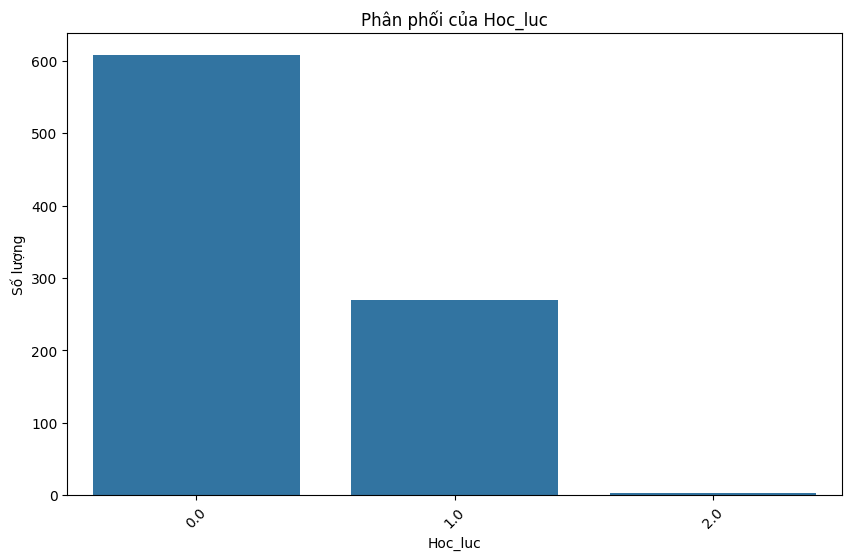

Hoc_luc
0.0    608
1.0    270
2.0      3
Name: count, dtype: int64


In [796]:
plot_bar_chart(df, 'Hoc_luc')
print(df['Hoc_luc'].value_counts(dropna=False))

In [797]:
# Xử lý các giá trị NaN và 3.0 trong cột 'Hanh_kiem'
df['Hanh_kiem'] = df['Hanh_kiem'].replace(2.0, np.nan)

# Lọc dữ liệu có giá trị 'Hanh_kiem' không phải NaN
df_known = df.dropna(subset=['Hanh_kiem'])
df_unknown = df[df['Hanh_kiem'].isna()]

# Kiểm tra nếu df_unknown không rỗng
if df_unknown.empty:
    print("Không có dòng nào có giá trị 'Hanh_kiem' là NaN.")
else:
    # Các cột đặc trưng
    features = ['K12_Math', 'K12_Ling', 'K12_Flang', 'K12_Phys', 'K12_Chem', 
                'K12_Bio', 'K12_Hist', 'K12_Geog', 'K12_AVG']

    # Tạo X_known và y_known
    X_known = df_known[features].copy()
    y_known = df_known['Hanh_kiem']

    # Mã hóa các biến phân loại
    label_encoders = {}
    for feature in features:
        le = LabelEncoder()
        X_known[feature] = le.fit_transform(X_known[feature].astype(str))
        label_encoders[feature] = le

    # Tạo bộ dữ liệu không biết giá trị và mã hóa
    X_unknown = df_unknown[features].copy()
    for feature in features:
        if X_unknown[feature].dtype == 'object':
            X_unknown[feature] = label_encoders[feature].transform(X_unknown[feature].astype(str))
        else:
            X_unknown[feature] = X_unknown[feature].astype(float)  # Đảm bảo kiểu dữ liệu đúng

    # Kiểm tra nếu X_unknown không rỗng
    if X_unknown.empty:
        print("Dữ liệu không hợp lệ trong X_unknown.")
    else:
        # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
        X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

        # Khởi tạo và huấn luyện mô hình hồi quy logistic
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)

        # Dự đoán các giá trị 'Hanh_kiem' trên tập kiểm tra
        y_pred = model.predict(X_test)
        print('Accuracy on test set:', accuracy_score(y_test, y_pred))

        # Dự đoán giá trị 'Hanh_kiem' cho các dòng không biết
        y_pred_unknown = model.predict(X_unknown)

        # Cập nhật DataFrame với các giá trị đã dự đoán
        df.loc[df['Hanh_kiem'].isna(), 'Hanh_kiem'] = y_pred_unknown

        # Kiểm tra kết quả
        print('Giá trị sau khi dự đoán bằng hồi quy logistic\n', df['Hanh_kiem'].value_counts(dropna=False), '\n')


Accuracy on test set: 1.0
Giá trị sau khi dự đoán bằng hồi quy logistic
 Hanh_kiem
0.0    876
1.0      5
Name: count, dtype: int64 



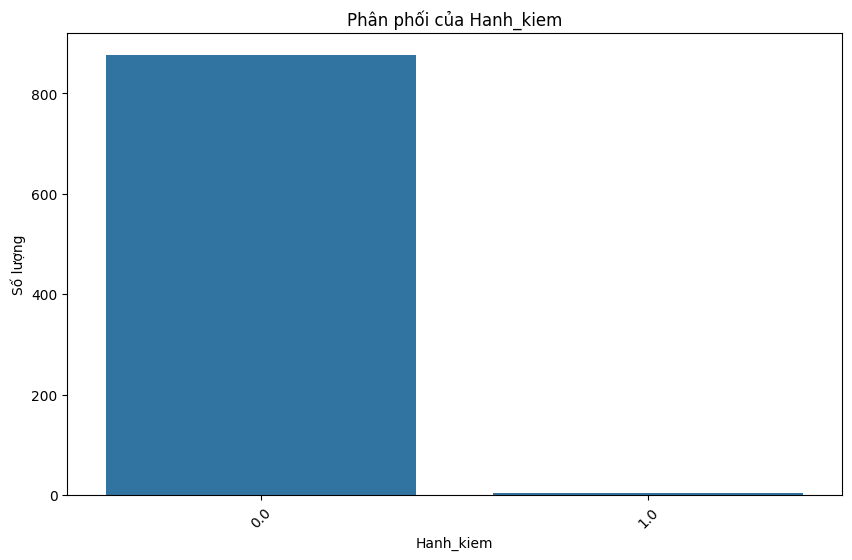

Hanh_kiem
0.0    876
1.0      5
Name: count, dtype: int64


In [798]:
plot_bar_chart(df, 'Hanh_kiem')
print(df['Hanh_kiem'].value_counts(dropna=False))

In [799]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 0 to 927
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          881 non-null    int64  
 1   ETH          881 non-null    int64  
 2   GraYear      881 non-null    int32  
 3   KVUT         0 non-null      float64
 4   PTXT         881 non-null    int32  
 5   PTXTname     881 non-null    int32  
 6   Hoc_luc      881 non-null    float64
 7   Hanh_kiem    881 non-null    float64
 8   To_hop       881 non-null    int32  
 9   ScoTHPT1     881 non-null    int64  
 10  ScoTHPT2     881 non-null    int64  
 11  ScoTHPT3     881 non-null    int64  
 12  ScoTHPT      881 non-null    int64  
 13  TB_HK1       881 non-null    int64  
 14  CN1          881 non-null    int64  
 15  CN2          881 non-null    int64  
 16  K12_Math     881 non-null    int64  
 17  K12_Ling     881 non-null    int64  
 18  K12_Flang    881 non-null    int64  
 19  K12_Phys     

In [800]:
df = df.drop(columns=['KVUT'], errors='ignore')

# Làm sạch dữ liệu cột Mjob và Fjob bằng mô hình PhoBERT và tokenizer sau đó phân cụm nó

In [801]:
# Tải mô hình PhoBERT và tokenizer
phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [802]:
# Chuyển đổi các giá trị trong cột 'Fjob' thành tensor
encoded_inputs = tokenizer(df['Fjob'].tolist(), padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    features = phobert(**encoded_inputs)
    embeddings = features.last_hidden_state.mean(dim=1)  # Lấy trung bình các vector đặc trưng

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [803]:
# Áp dụng K-Means để phân cụm
kmeans = KMeans(n_clusters=5, random_state=42)
df['Fjob_Cluster'] = kmeans.fit_predict(embeddings)

In [804]:
# Giảm số chiều xuống 3 chiều để dễ dàng vẽ biểu đồ 3D
pca = PCA(n_components=3)
embedding_3d = pca.fit_transform(embeddings.numpy())
# Thêm kết quả PCA vào DataFrame
df['PCA1'] = embedding_3d[:, 0]
df['PCA2'] = embedding_3d[:, 1]
df['PCA3'] = embedding_3d[:, 2]

# Tạo biểu đồ 3D
fig = px.scatter_3d(df, x='PCA1', y='PCA2', z='PCA3', color='Fjob_Cluster', 
                    hover_data=['Fjob'],
                    title="Phân Cụm Các Nghề Nghiệp Bằng DBSCAN")

# Hiển thị biểu đồ
fig.show()

# <h1>Xuất file sau khi đã làm sạch dữ liệu v0</h1>

In [805]:
df = df.drop(columns=['PCA1', 'PCA2','PCA3','Mjob','Fjob' ], errors='ignore')
df.to_csv('data/DataFinal/model/raw/SIU/data_clean_v0.csv')

In [806]:
df = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v0.csv')
df = df.drop(columns=['Unnamed: 0'])

In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           881 non-null    int64  
 1   ETH           881 non-null    int64  
 2   GraYear       881 non-null    int64  
 3   PTXT          881 non-null    int64  
 4   PTXTname      881 non-null    int64  
 5   Hoc_luc       881 non-null    float64
 6   Hanh_kiem     881 non-null    float64
 7   To_hop        881 non-null    int64  
 8   ScoTHPT1      881 non-null    int64  
 9   ScoTHPT2      881 non-null    int64  
 10  ScoTHPT3      881 non-null    int64  
 11  ScoTHPT       881 non-null    int64  
 12  TB_HK1        881 non-null    int64  
 13  CN1           881 non-null    int64  
 14  CN2           881 non-null    int64  
 15  K12_Math      881 non-null    int64  
 16  K12_Ling      881 non-null    int64  
 17  K12_Flang     881 non-null    int64  
 18  K12_Phys      881 non-null    

# <h1>Trực quan hóa phân bố dữ liệu</h1>

In [808]:

# Tính toán số hàng và cột dựa trên số lượng cột trong df
columns_to_plot = df.columns
n_cols = 3  # Giả sử bạn muốn có 4 cột trong mỗi hàng
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Khởi tạo subplot
fig = sp.make_subplots(rows=n_rows, cols=n_cols, subplot_titles=columns_to_plot)

# Tạo một danh sách các màu sắc ngẫu nhiên cho biểu đồ
random_colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in columns_to_plot]

# Vẽ biểu đồ phân phối cho từng biến
for i, (column, color) in enumerate(zip(columns_to_plot, random_colors)):
    row = i // n_cols + 1
    col = i % n_cols + 1

    fig.add_trace(
        go.Histogram(x=df[column], marker=dict(color=color), name=column, showlegend=False),
        row=row, col=col
    )

    fig.update_xaxes(title_text=f'{column}', row=row, col=col)
    fig.update_yaxes(title_text=f'{column} Count', row=row, col=col)

# Chỉnh layout và hiển thị biểu đồ
fig.update_layout(height=500 * n_rows, width=1100, title_text="Biểu Đồ Phân Bố Dữ Liệu")
fig.show()



In [809]:
# Tính toán số hàng và cột dựa trên số lượng cột trong df
columns_to_plot = df.columns
n_cols = 3  # Giả sử bạn muốn có 4 cột trong mỗi hàng
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Khởi tạo subplot
fig = sp.make_subplots(rows=n_rows, cols=n_cols, subplot_titles=columns_to_plot)

# Tạo một danh sách các màu sắc ngẫu nhiên cho biểu đồ
random_colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in columns_to_plot]

# Vẽ box plot cho từng cột
for i, (column, color) in enumerate(zip(columns_to_plot, random_colors)):
    row = i // n_cols + 1
    col = i % n_cols + 1

    fig.add_trace(
        go.Box(y=df[column], marker=dict(color=color), name=column, showlegend=False),
        row=row, col=col
    )

    fig.update_xaxes(title_text=f'{column} Box Plot', row=row, col=col)
    fig.update_yaxes(title_text=f'{column} Value', row=row, col=col)

# Chỉnh layout và hiển thị biểu đồ
fig.update_layout(height=400 * n_rows, width=1100, title_text="Biểu Đồ Box Plot Các Cột Dữ Liệu")
fig.show()


In [810]:
from plotly.subplots import make_subplots
df_visualize = df.copy()
# Tạo biểu đồ cột phân bố số lượng sinh viên theo giới tính
sex_counts = df_visualize['Sex'].value_counts()
sex_labels = {0: 'Nam', 1: 'Nữ'}
sex_counts.index = sex_counts.index.map(sex_labels)

bar_fig = go.Figure()

bar_fig.add_trace(go.Bar(
    x=sex_counts.index,
    y=sex_counts.values,
    name='Số lượng sinh viên',
    marker_color=['blue', 'pink']
))

bar_fig.update_layout(
    title='Phân bố số lượng sinh viên theo giới tính',
    xaxis_title='Giới tính',
    yaxis_title='Số lượng sinh viên',
    xaxis=dict(tickvals=[0, 1], ticktext=['Nam', 'Nữ']),
    showlegend=False
)

# Tạo biểu đồ boxplot cho toàn bộ giá trị trong cột 'Sex'
box_fig = go.Figure()

box_fig.add_trace(go.Box(
    y=df_visualize['Sex'],
    name='Giới tính',
    boxmean='sd'
))

box_fig.update_layout(
    title='Boxplot giá trị cột Giới tính',
    yaxis_title='Giới tính',
    yaxis=dict(tickvals=[0, 1], ticktext=['Nam', 'Nữ']),
    showlegend=False
)

# Tạo layout cho hai biểu đồ nằm trong một hàng
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=('Biểu đồ cột', 'Boxplot'))

fig.add_trace(bar_fig.data[0], row=1, col=1)
fig.add_trace(box_fig.data[0], row=1, col=2)

fig.update_layout(
    title_text='Trực quan hóa dữ liệu giới tính',
    showlegend=False
)

fig.show()

                   Sex       ETH   GraYear      PTXT  PTXTname   Hoc_luc  \
Sex           1.000000 -0.089293  0.009850 -0.058421  0.091150 -0.057708   
ETH          -0.089293  1.000000  0.005448  0.045875 -0.015637 -0.133355   
GraYear       0.009850  0.005448  1.000000  0.005342  0.065421 -0.038230   
PTXT         -0.058421  0.045875  0.005342  1.000000 -0.363804 -0.039524   
PTXTname      0.091150 -0.015637  0.065421 -0.363804  1.000000 -0.049138   
Hoc_luc      -0.057708 -0.133355 -0.038230 -0.039524 -0.049138  1.000000   
Hanh_kiem    -0.111393  0.035045  0.025610 -0.007472  0.002547  0.142199   
To_hop        0.120009  0.017064  0.013783  0.324513 -0.114162  0.050005   
ScoTHPT1     -0.044352  0.110429 -0.034261  0.462388 -0.157609  0.133900   
ScoTHPT2     -0.057955  0.217278  0.092508  0.458165 -0.156169  0.016939   
ScoTHPT3     -0.055311  0.256126  0.063989  0.372534 -0.126981  0.061028   
ScoTHPT      -0.038710  0.497525  0.073514 -0.109684  0.050476  0.089515   
TB_HK1      

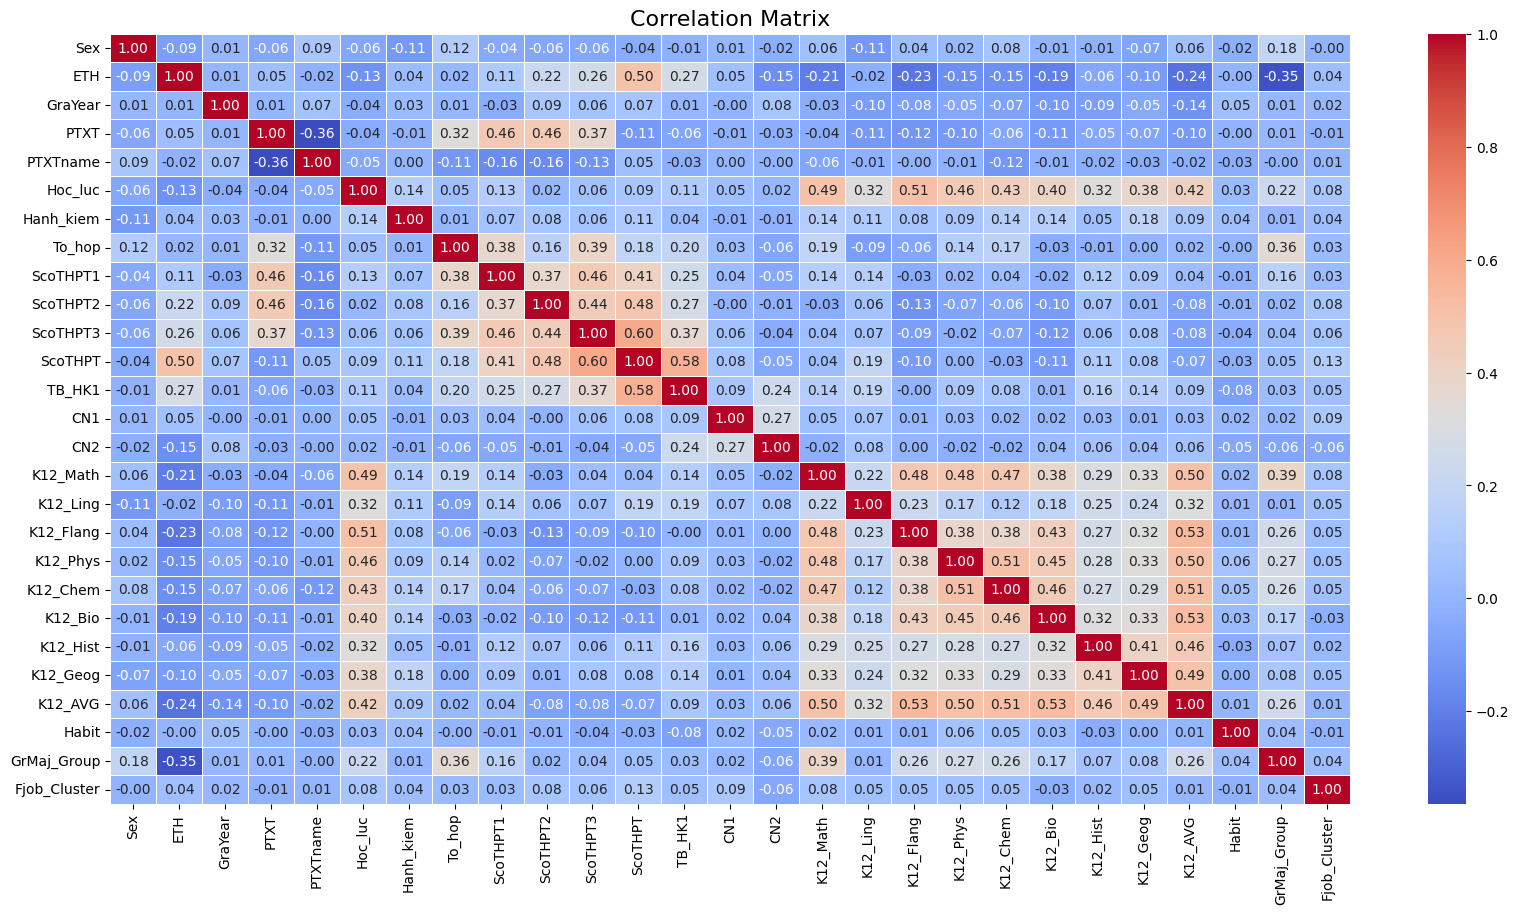

In [811]:
corr_matrix = df.corr()
print(corr_matrix)
# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [812]:
# Tính toán ma trận tương quan giữa các cột cần thiết
corr_subset = df[['GraYear', 'ScoTHPT1', 'ScoTHPT2', 'ScoTHPT3', 'TB_HK1']].corr()
# In ra màn hình tỷ lệ tương quan
print(corr_subset)

           GraYear  ScoTHPT1  ScoTHPT2  ScoTHPT3    TB_HK1
GraYear   1.000000 -0.034261  0.092508  0.063989  0.011230
ScoTHPT1 -0.034261  1.000000  0.373885  0.456751  0.252509
ScoTHPT2  0.092508  0.373885  1.000000  0.438010  0.272926
ScoTHPT3  0.063989  0.456751  0.438010  1.000000  0.370521
TB_HK1    0.011230  0.252509  0.272926  0.370521  1.000000


Ảnh Hưởng của GraYear: Dựa trên các hệ số tương quan, GraYear không có ảnh hưởng rõ rệt đến điểm số trong các kỳ thi THPT (ScoTHPT1, ScoTHPT2, ScoTHPT3).<br> Các hệ số tương quan rất thấp cho thấy không có mối liên hệ đáng kể giữa năm tốt nghiệp và điểm số và output là TB_HK1. Nên quyết định xóa cột dữ liệu này đi.

In [813]:
# df = df.drop(columns=['GraYear' ], errors='ignore')

- Ảnh Hưởng của PTXTname: Dựa trên các hệ số tương quan, PTXTname có hệ số tương quan rất thấp cho thấy không có mối liên hệ đáng kể giữa PTXTname và <br>các cột dữ liệu, chỉ tương quan ngược chiều mạnh nhất PTXT mà bản thân PTXT cũng đã đại diện cho PTXTname. Nên quyết định xóa cột dữ liệu này đi.
- PTXT có 4 giá trị khác nhau nhưng 1 giá trị có số lượng rất lớn áp đảo các giá trị còn lại, sẽ ảnh hưởng xấu đến mô hình nên quyết định xóa nó đi
- Hanh_kiem cũng tương tự

In [814]:
df = df.drop(columns=['PTXTname','PTXT','Hanh_kiem' ], errors='ignore')

                TB_HK1
TB_HK1        1.000000
ScoTHPT       0.576168
ScoTHPT3      0.370521
ScoTHPT2      0.272926
ETH           0.269969
ScoTHPT1      0.252509
CN2           0.239530
To_hop        0.200426
K12_Ling      0.190672
K12_Hist      0.161624
K12_Geog      0.137899
K12_Math      0.136317
Hoc_luc       0.112026
CN1           0.093105
K12_Phys      0.088594
K12_AVG       0.086103
K12_Chem      0.080612
Fjob_Cluster  0.047198
GrMaj_Group   0.033650
GraYear       0.011230
K12_Bio       0.010273
K12_Flang    -0.001560
Sex          -0.012857
Habit        -0.083527


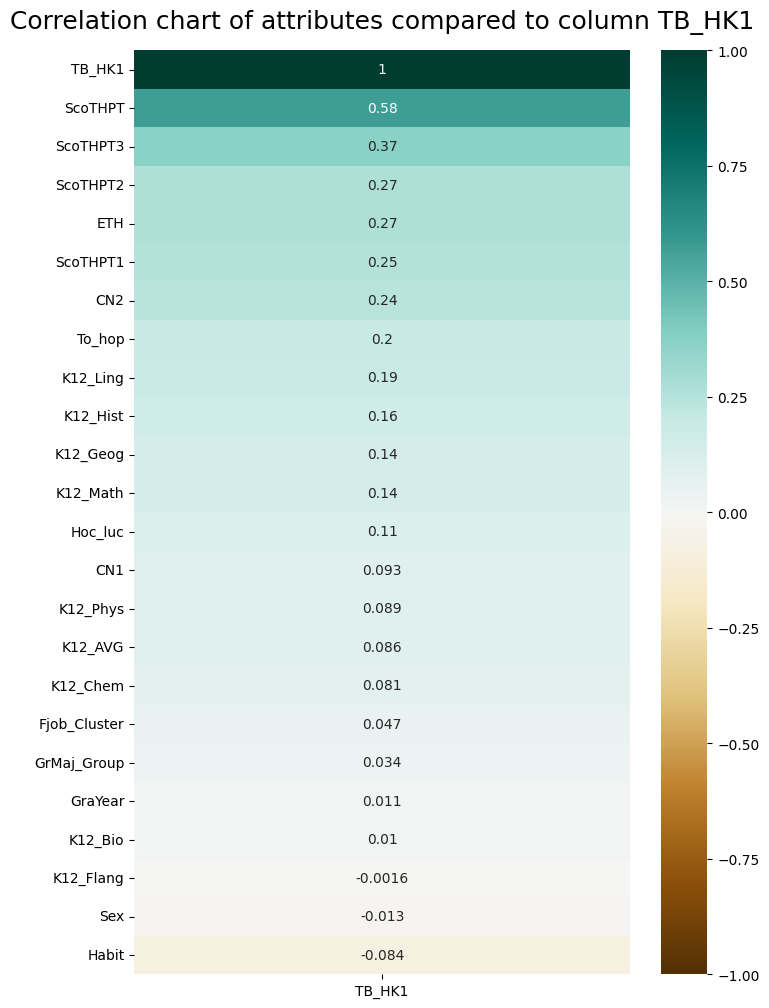

In [815]:
correlation_matrix = df.corr()
# Lấy độ tương quan của tất cả các cột với cột 'TB_HK1'
tb_hk1_correlation = correlation_matrix[['TB_HK1']].sort_values(by='TB_HK1', ascending=False)

# In ra màn hình các giá trị tương quan với cột 'TB_HK1'
print(tb_hk1_correlation)

# Trực quan hóa các giá trị tương quan bằng heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(tb_hk1_correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation chart of attributes compared to column TB_HK1', fontdict={'fontsize':18}, pad=16)
plt.show()

- Tương quan mạnh với ScoTHPT: Cột ScoTHPT có tương quan cao nhất với TB_HK1 (0.582667). Điều này cho thấy điểm trung bình học kỳ 1 (TB_HK1) có mối quan hệ khá chặt chẽ với điểm tổng kết của học sinh trong kỳ thi THPT.

- Tương quan trung bình với ScoTHPT3, CN2, ScoTHPT2: Các biến này có tương quan trung bình với TB_HK1, với giá trị tương quan lần lượt là 0.381950, 0.322585, và 0.297622. Điều này chỉ ra rằng điểm tổng kết của học sinh trong các năm học khác và các môn học khác cũng có ảnh hưởng nhất định đến TB_HK1.

- Tương quan yếu với các biến khác: Một số biến như CN1, To_hop, K12_Ling, K12_Math... có độ tương quan yếu với TB_HK1, với giá trị từ khoảng 0.2 đến 0.1. Mặc dù các biến này có ảnh hưởng đến TB_HK1, nhưng không phải là yếu tố quyết định.

- Tương quan âm với PTXT, Sex, Habit: Các biến này có tương quan âm với TB_HK1, với giá trị tương quan lần lượt là -0.041580, -0.068646, và -0.083303. Điều này cho thấy rằng những biến này có xu hướng giảm khi TB_HK1 tăng, mặc dù ảnh hưởng của chúng không quá đáng kể.

In [816]:
df_visualize = df.copy()

              ScoTHPT3
ScoTHPT3      1.000000
ScoTHPT       0.601039
ScoTHPT1      0.456751
ScoTHPT2      0.438010
To_hop        0.388460
TB_HK1        0.370521
ETH           0.256126
K12_Geog      0.079372
K12_Ling      0.065298
GraYear       0.063989
Fjob_Cluster  0.062921
Hoc_luc       0.061028
CN1           0.057850
K12_Hist      0.055169
K12_Math      0.043817
GrMaj_Group   0.037034
K12_Phys     -0.017987
Habit        -0.035727
CN2          -0.039145
Sex          -0.055311
K12_Chem     -0.067279
K12_AVG      -0.084536
K12_Flang    -0.090049
K12_Bio      -0.118339


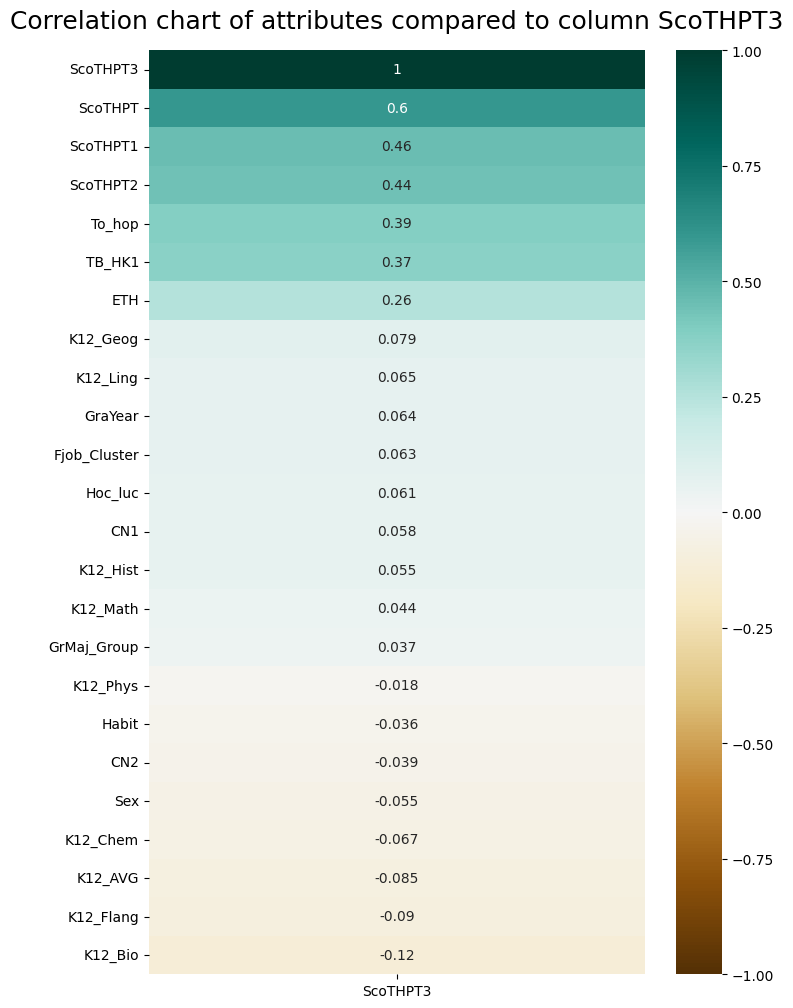

In [817]:
correlation_matrix = df.corr()
# Lấy độ tương quan của tất cả các cột với cột 'TB_HK1'
tb_hk1_correlation = correlation_matrix[['ScoTHPT3']].sort_values(by='ScoTHPT3', ascending=False)

# In ra màn hình các giá trị tương quan với cột 'TB_HK1'
print(tb_hk1_correlation)

# Trực quan hóa các giá trị tương quan bằng heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(tb_hk1_correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation chart of attributes compared to column ScoTHPT3', fontdict={'fontsize':18}, pad=16)
plt.show()

In [818]:
df_visualize = pd.DataFrame()

In [819]:
def reverse_TBHK1(diem):
    if diem == 0:
        return "Xuất sắc"
    elif diem == 1:
        return "Giỏi"
    elif diem == 2:
        return "Khá"
    elif diem == 3:
        return "Trung bình - Yếu"
    

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Giỏi'),
  Text(1, 0, 'Khá'),
  Text(2, 0, 'Trung bình - Yếu'),
  Text(3, 0, 'Xuất sắc')])

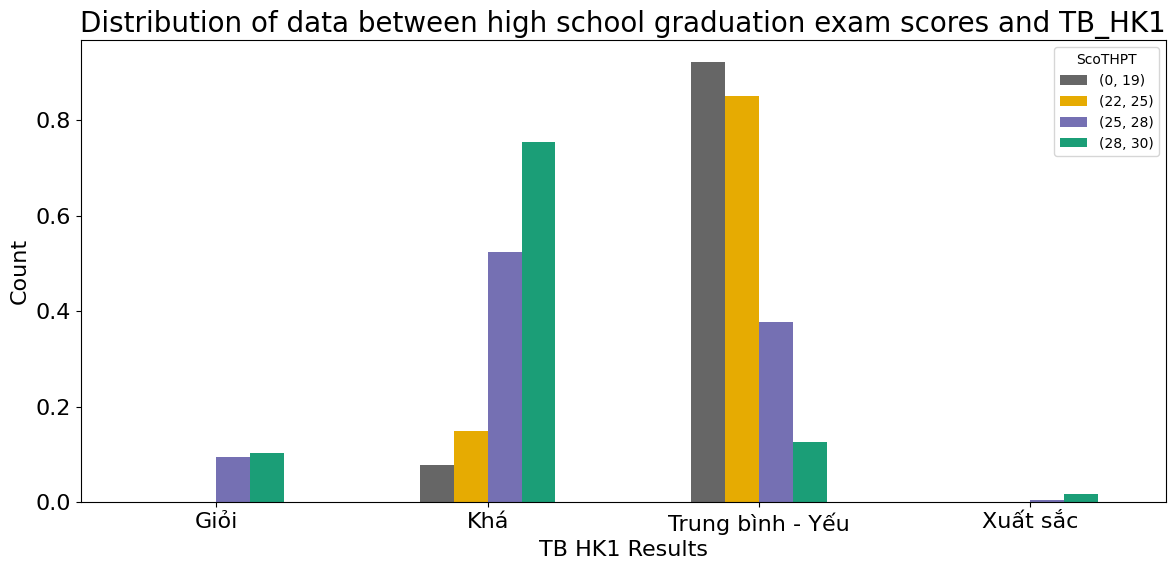

In [820]:
def reverse_function_ScoTHPT(score):
    if score == 0:
        return "(28, 30)"
    elif score == 1:
        return "(25, 28)"
    elif score == 2:
        return "(22, 25)"
    elif score == 3:
        return "(0, 19)"

df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)
df_visualize['ScoTHPT'] = df['ScoTHPT'].apply(reverse_function_ScoTHPT)

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['ScoTHPT'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14, 6), fontsize=16)
plt.title('Distribution of data between high school graduation exam scores and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)


Nhận xét: 
- Những sinh viên có kết quả xuất sắc và giỏi thường có điểm tốt nghiệp thpt từ 25 trở lên
- Những sinh viên có kết quả khá ,trung bình và kém thường có điểm tốt nghiệp thpt từ 19 điểm đến 22

In [821]:
df = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v0.csv')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Giỏi'),
  Text(1, 0, 'Khá'),
  Text(2, 0, 'Trung bình - Yếu'),
  Text(3, 0, 'Xuất sắc')])

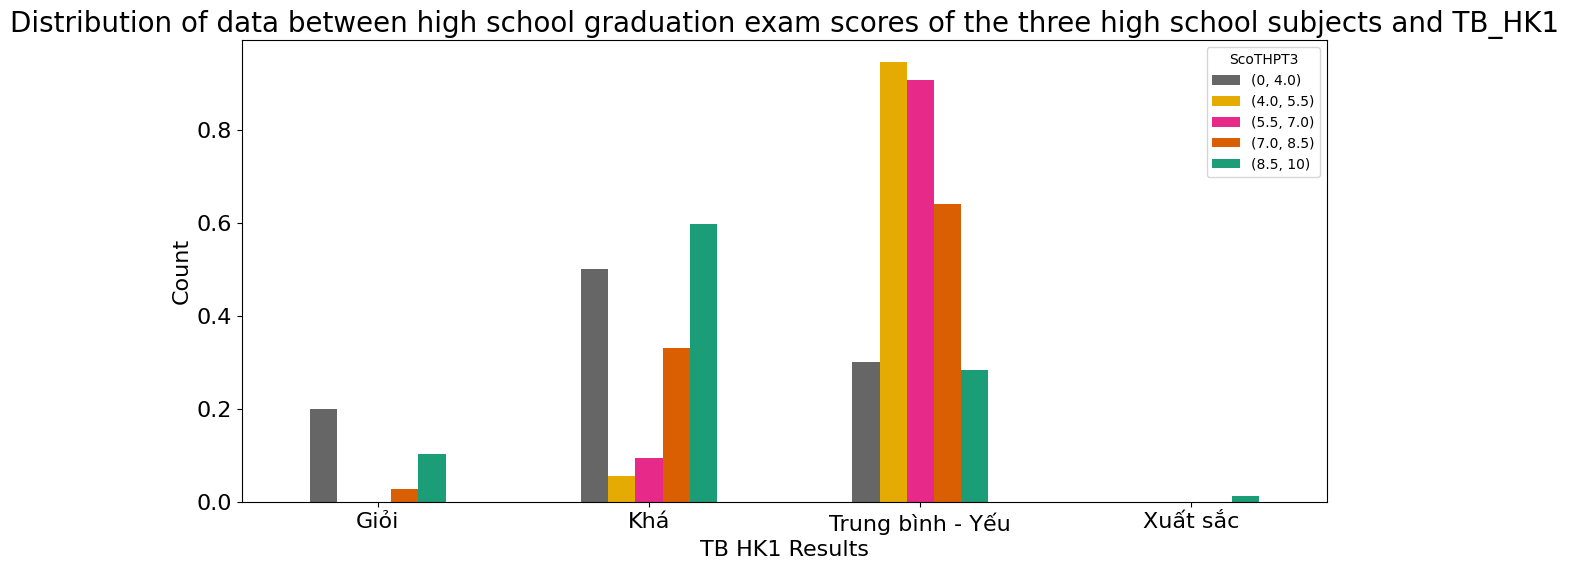

In [822]:
df_visualize = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v0.csv')
df_visualize = df_visualize.drop(columns=['Unnamed: 0'])
df_visualize = df.copy()

def reverse_function_ScoTHPT2(numeric_score):
    if numeric_score == 0:
        return "(8.5, 10)"
    elif numeric_score == 1:
        return "(7.0, 8.5)"
    elif numeric_score == 2:
        return "(5.5, 7.0)"
    elif numeric_score == 3:
        return "(4.0, 5.5)"
    elif numeric_score == 4:
        return "(0, 4.0)"
    else:
        return None  # for invalid numeric scores



df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)
df_visualize['ScoTHPT3'] = df['ScoTHPT3'].apply(reverse_function_ScoTHPT2)

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['ScoTHPT3'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14, 6), fontsize=16)
plt.title('Distribution of data between high school graduation exam scores of the three high school subjects and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)


Nhận xét: 
- Những sinh viên có kết quả xuất sắc thường là những sinh viên có điểm thi thpt môn thứ 3 trên 8.5
- Những sinh viên có kết quả giỏi và khá thường là những sinh viên có điểm thi thpt môn thứ 3 trên 8.5 hoặc dưới 4 điểm 
- Những sinh viên có kết quả trung bình thường là những sinh viên có điểm thi thpt môn thứ 3 từ 5.5 đến 7
- Những sinh viên có kết quả yếu thường là những sinh viên có điểm thi thpt môn thứ 3 dưới từ 4 đến 5.5

Text(0, 0.5, 'Count')

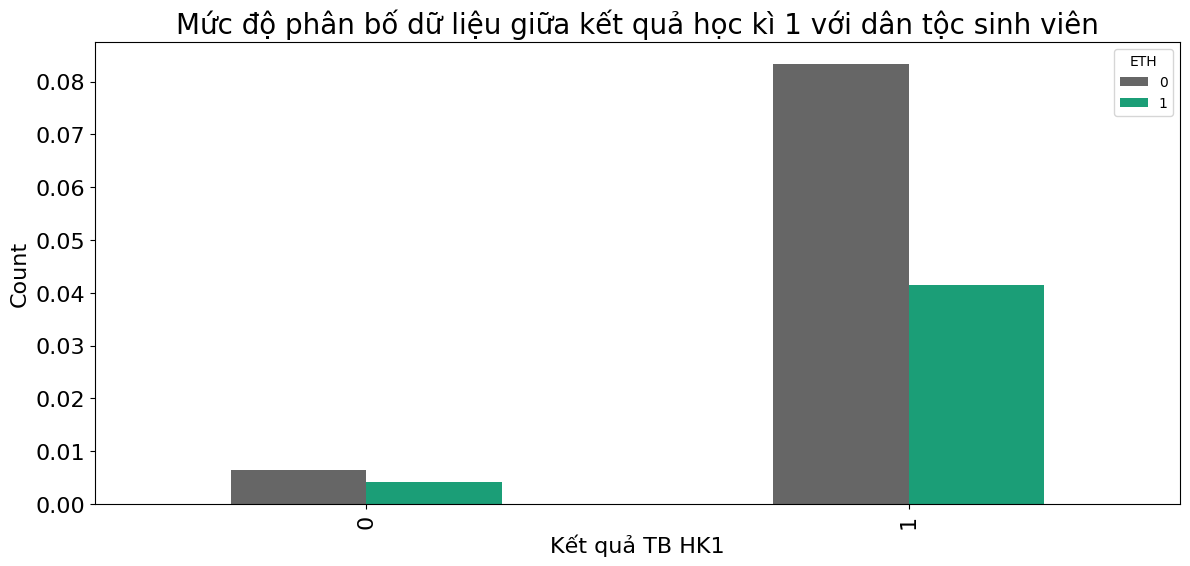

In [823]:
perc = (lambda col: col/col.sum())
index = [0,1]
higher_tab = pd.crosstab(index=df['TB_HK1'], columns=df['ETH'])
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Mức độ phân bố dữ liệu giữa kết quả học kì 1 với dân tộc sinh viên', fontsize=20)
plt.xlabel('Kết quả TB HK1', fontsize=16)
plt.ylabel('Count', fontsize=16)

Nhận xét: 
- Những sinh viên có kết quả xuất sắc, giỏi và khá thường là những sinh viên dân tộc thiểu số

Text(0, 0.5, 'Count')

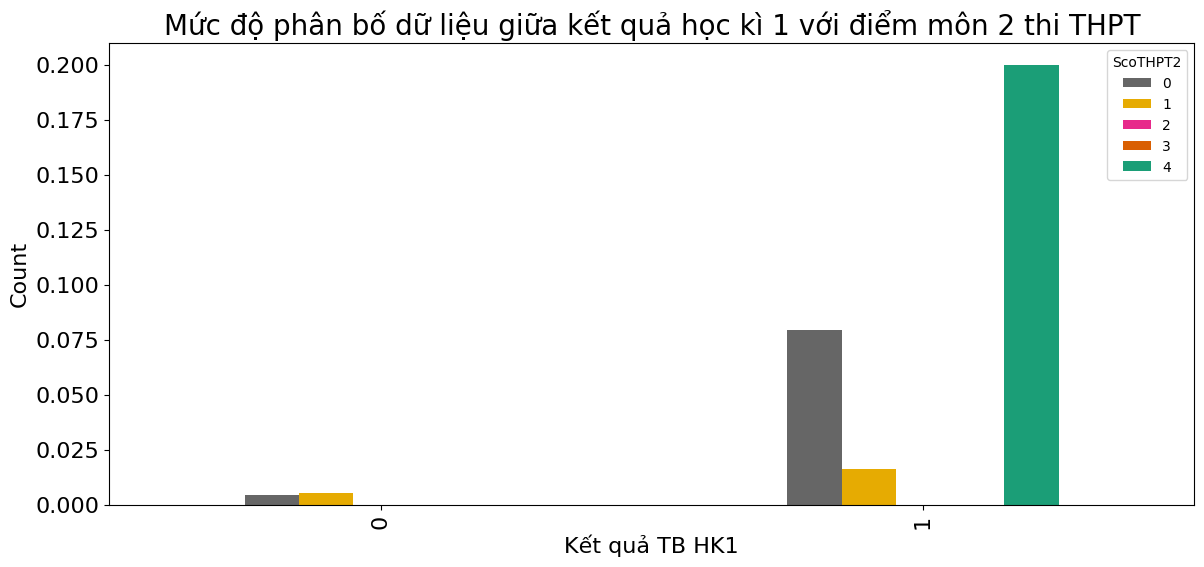

In [824]:
perc = (lambda col: col/col.sum())
index = [0,1]
higher_tab = pd.crosstab(index=df['TB_HK1'], columns=df['ScoTHPT2'])
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Mức độ phân bố dữ liệu giữa kết quả học kì 1 với điểm môn 2 thi THPT', fontsize=20)
plt.xlabel('Kết quả TB HK1', fontsize=16)
plt.ylabel('Count', fontsize=16)

Nhận xét: 
- Những sinh viên có kết quả xuất sắc thường là những sinh viên có điểm thi thpt môn thứ 2 trên 7
- Những sinh viên có kết quả giỏi và khá thường là những sinh viên có điểm thi thpt môn thứ 2 trên 8.5 hoặc dưới 4 điểm 
- Những sinh viên có kết quả trung bình thường là những sinh viên có điểm thi thpt môn thứ 2 từ 5.5 đến 7
- Những sinh viên có kết quả yếu thường là những sinh viên có điểm thi thpt môn thứ 2 dưới từ 4 đến 5.5

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Giỏi'),
  Text(1, 0, 'Khá'),
  Text(2, 0, 'Trung bình - Yếu'),
  Text(3, 0, 'Xuất sắc')])

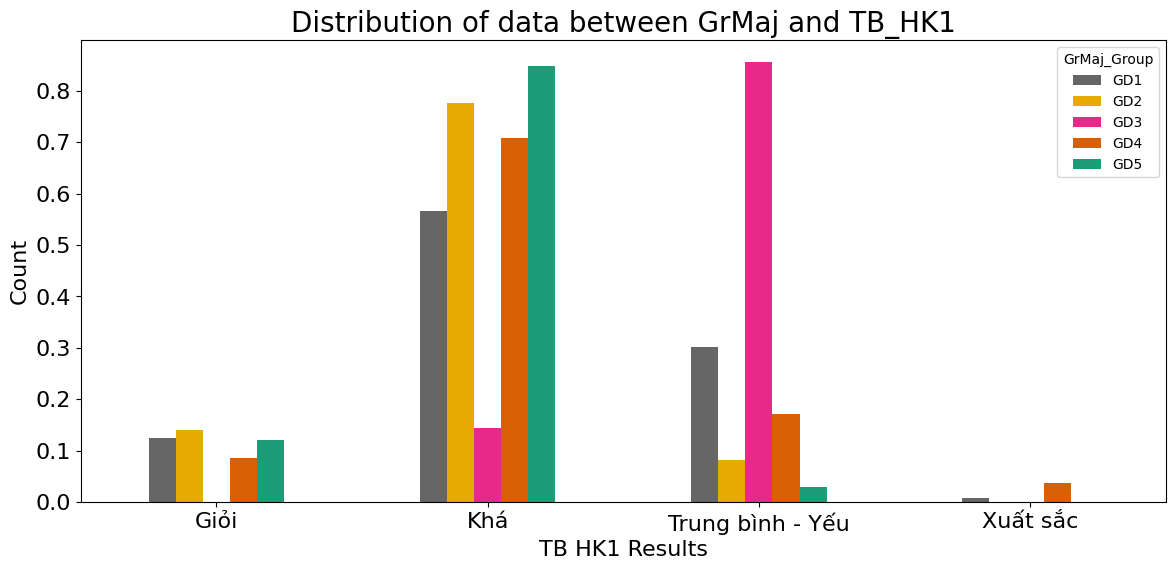

In [825]:
df_visualize = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v0.csv')
df_visualize = df_visualize.drop(columns=['Unnamed: 0'])

df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)

# Load mô hình LabelEncoder
label_encoder = joblib.load('B:/DoAnTotNghiep/DATA_Giaoduc/label_encoder/SIU/GrMaj_Group_labelencoder.pkl')  # Thay đổi đường dẫn nếu cần

# Giả sử df_visualize là DataFrame đã được tạo trước đó
df_visualize['GrMaj_Group'] = label_encoder.inverse_transform(df['GrMaj_Group'])

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['GrMaj_Group'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14, 6), fontsize=16)
plt.title('Distribution of data between GrMaj and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Giỏi'),
  Text(1, 0, 'Khá'),
  Text(2, 0, 'Trung bình - Yếu'),
  Text(3, 0, 'Xuất sắc')])

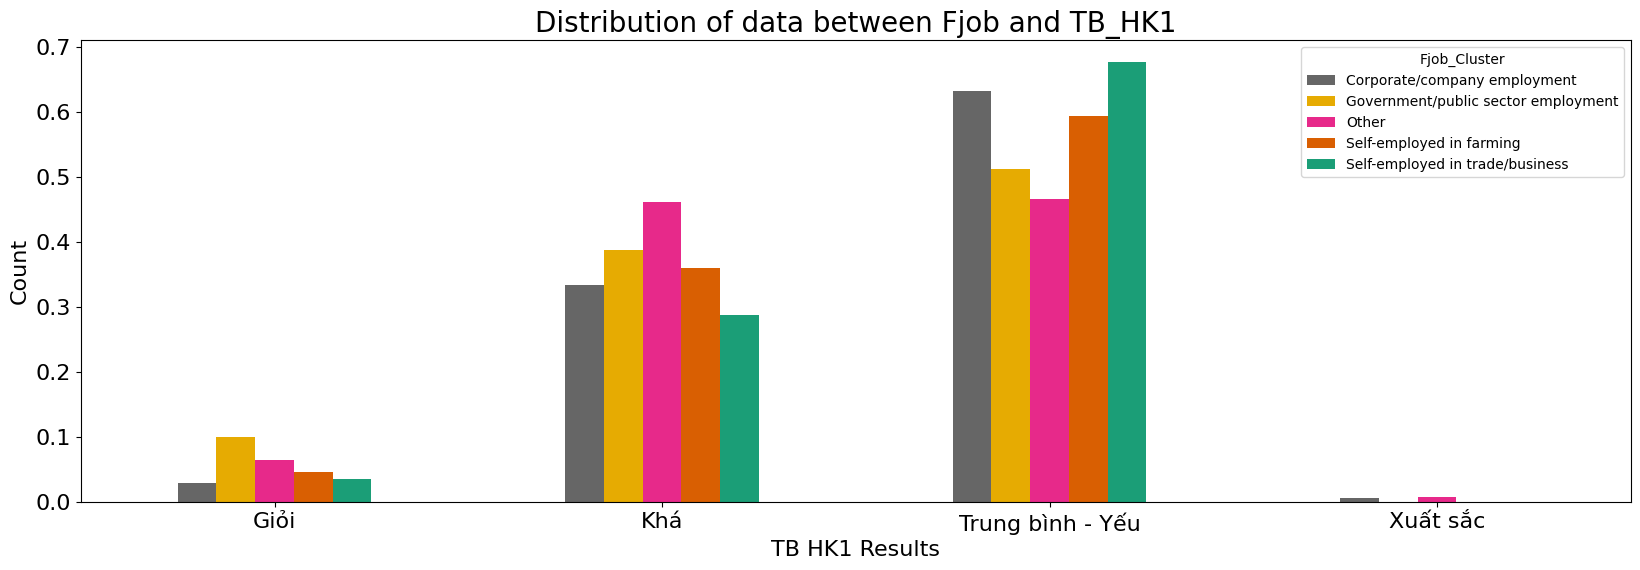

In [826]:
df_visualize = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v0.csv')
df_visualize = df_visualize.drop(columns=['Unnamed: 0'])

df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)

def reverse_function_Fjob(value):
    if value == 0:
        return "Other"
    elif value == 1:
        return "Corporate/company employment"
    elif value == 2:
        return "Self-employed in trade/business"
    elif value == 3:
        return "Self-employed in farming"
    elif value == 4:
        return "Government/public sector employment"
    else:
        return None  # for invalid numeric scores

df_visualize['Fjob_Cluster'] = df['Fjob_Cluster'].apply(reverse_function_Fjob)

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['Fjob_Cluster'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(20, 6), fontsize=16)
plt.title('Distribution of data between Fjob and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Giỏi'),
  Text(1, 0, 'Khá'),
  Text(2, 0, 'Trung bình - Yếu'),
  Text(3, 0, 'Xuất sắc')])

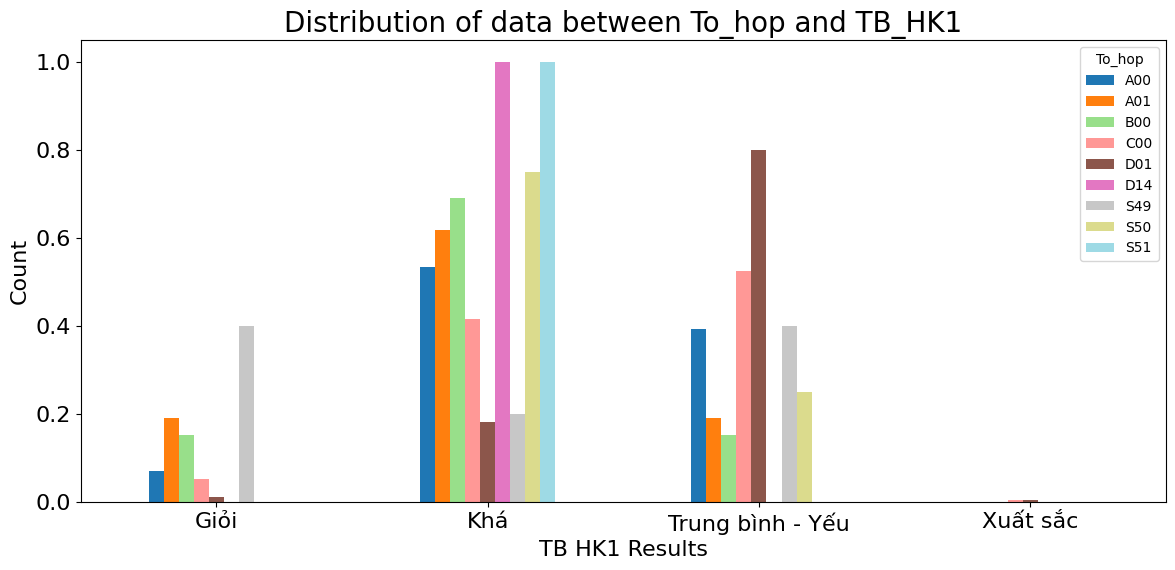

In [827]:

df_visualize = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v0.csv')
df_visualize = df_visualize.drop(columns=['Unnamed: 0'])

df_visualize['TB_HK1'] = df['TB_HK1'].apply(reverse_TBHK1)

# Load mô hình LabelEncoder
label_encoder = joblib.load('B:/DoAnTotNghiep/DATA_Giaoduc/label_encoder/SIU/To_hop_labelencoder.pkl')  # Thay đổi đường dẫn nếu cần

# Giả sử df_visualize là DataFrame đã được tạo trước đó
df_visualize['To_hop'] = label_encoder.inverse_transform(df['To_hop'])

perc = (lambda col: col / col.sum())
higher_tab = pd.crosstab(index=df_visualize['TB_HK1'], columns=df_visualize['To_hop'])
higher_perc = higher_tab.apply(perc)
higher_perc.plot.bar(colormap="tab20", figsize=(14, 6), fontsize=16)
plt.title('Distribution of data between To_hop and TB_HK1', fontsize=20)
plt.xlabel('TB HK1 Results', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)


# <h1>Xuất file làm sạch v1</h1>

In [ ]:
df.to_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')

In [ ]:
df.info()

In [ ]:
df_clean = pd.DataFrame()
df_clean = df

# <h1>Huấn luyện mô hình</h1>

In [ ]:
import pandas as pd
import numpy as np
import warnings
import joblib
import plotly.figure_factory as ff

from xgboost import XGBRegressor, XGBClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.metrics import make_scorer,accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import classification_report ,roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning


In [ ]:
df_clean = pd.read_csv('data/data/data/DataFinal/model/raw/SIU/data_clean_v1.csv')
df_clean = df_clean.drop(columns=['Unnamed: 0'])

In [ ]:
show_infor_dataframe(df_clean)

In [ ]:
corr_matrix = df_clean.corr()

# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [ ]:
correlation_matrix = df.corr()
# Lấy độ tương quan của tất cả các cột với cột 'TB_HK1'
tb_hk1_correlation = correlation_matrix[['TB_HK1']].sort_values(by='TB_HK1', ascending=False)

# In ra màn hình các giá trị tương quan với cột 'TB_HK1'
print(tb_hk1_correlation)

# Trực quan hóa các giá trị tương quan bằng heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(tb_hk1_correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Các giá trị tương quan với cột TB_HK1', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
df_trainmodel = pd.DataFrame()
df_trainmodel = df_clean

In [ ]:
# Các cột cần Label Encode
columns_to_encode = df_trainmodel.columns
# Thực hiện Label Encoding
df_trainmodel, label_encoders = label_encode_columns(df_trainmodel, columns_to_encode)

In [ ]:
# Tách đầu vào và đầu ra
# X = df_trainmodel.drop(columns=['GrMaj','TB_HK1','CN1', 'CN2'])
# y = df_trainmodel['GrMaj']

X = df_trainmodel.drop(columns=['TB_HK1','CN1', 'CN2'])
y = df_trainmodel['TB_HK1']

# XGBRegressor

Trước khi điều chỉnh các tham số của thuật toán XGBRegressor, có thể điều chỉnh trạng thái ngẫu nhiên tối ưu trước khi chia dữ liệu và điều chỉnh nó cho XGBRegressor. Vì lý do này, trước tiên chúng ta sẽ chọn một phương pháp trả về "optimal_state" để tối đa hóa độ chính xác

In [ ]:
optimal_state = None
best_score = float('-inf')

for _ in range(100):
    state = np.random.randint(1, 100000000) - 1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    model = XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    score = r2_score(y_test, y_pred)
    
    if score > best_score:
        best_score = score
        optimal_state = state

print(f'Optimal random_state: {optimal_state}')
print(f'Best Score: {best_score}')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=59825599)

In [ ]:
#Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


Cross-Validation chia dữ liệu thành 8 phần. shuffle=True đảm bảo rằng dữ liệu sẽ được xáo trộn trước khi chia

In [ ]:
# Danh sách các giá trị của n_estimators để kiểm tra
n_estimators_values = range(1, 80, 1)

# Khởi tạo danh sách để lưu các giá trị chỉ số đánh giá
cv_rmse_values = []

# Sử dụng KFold để phân chia dữ liệu cho cross-validation
kf = KFold(n_splits=8, shuffle=True, random_state=optimal_state)

for n_estimators in n_estimators_values:
    # Tạo mô hình XGBoost với giá trị n_estimators hiện tại
    model = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, learning_rate=0.1, max_depth=3)
    
    # Thực hiện cross-validation và tính RMSE
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    
    # Tính toán RMSE từ MSE (scores là âm vì là negative MSE)
    rmse = np.sqrt(-np.mean(scores))
    cv_rmse_values.append(rmse)
    
    print(f'n_estimators: {n_estimators}')
    print(f'CV RMSE: {rmse}')
    print('--------------------------')

# Tìm giá trị n_estimators tốt nhất
best_n_estimators = n_estimators_values[np.argmin(cv_rmse_values)]
best_rmse = min(cv_rmse_values)

# In giá trị n_estimators tốt nhất
print(f'Best n_estimators: {best_n_estimators}')
print(f'Best CV RMSE: {best_rmse}')

# Tạo đồ thị so sánh các chỉ số đánh giá với n_estimators bằng Plotly
fig = go.Figure()

# Thêm dữ liệu vào đồ thị
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=cv_rmse_values, mode='lines+markers',
                         name='CV RMSE', line=dict(color='blue')))

# Đánh dấu vị trí best_n_estimators bằng một đường thẳng màu đỏ
fig.add_vline(x=best_n_estimators, line=dict(color='red', dash='dash'), name=f'Best n_estimators ({best_n_estimators})')

# Thiết lập các thuộc tính cho biểu đồ
fig.update_layout(
    title="Cross-Validated RMSE vs n_estimators for XGBoost Regressor",
    xaxis_title="n_estimators",
    yaxis_title="CV RMSE",
    showlegend=True,
    legend_title='Metrics',
    template='plotly_dark',
)

# Hiển thị đồ thị
fig.show()

<h3>Tìm n_estimators_values tốt nhất cho mô hình dựa vào các chỉ số đánh giá </h3>

Các chỉ số đánh giá:
- Train MSE (Mean Squared Error): Đo lường trung bình bình phương của sự khác biệt giữa giá trị thực tế và giá trị dự đoán trên tập huấn luyện.
- Test MSE: Tương tự như Train MSE, nhưng được tính trên tập kiểm tra.
- Train R2 Score: Đánh giá độ chính xác của mô hình trên tập huấn luyện, phản ánh tỷ lệ phương sai của mục tiêu mà mô hình có thể giải thích được.
- Test R2 Score: Tương tự như Train R2 Score, nhưng được tính trên tập kiểm tra.
- Train MAE (Mean Absolute Error): Đo lường trung bình độ lệch tuyệt đối giữa giá trị thực tế và giá trị dự đoán trên tập huấn luyện.
- Test MAE: Tương tự như Train MAE, nhưng được tính trên tập kiểm tra.
- RMSE (Root Mean Squared Error): Là căn bậc hai của MSE, thường được sử dụng như một chỉ số trực quan hơn để đánh giá hiệu suất của mô hình.
- Adjusted R2 Score: Đây là một biến thể của R2 Score, điều chỉnh dựa trên số lượng mẫu và số lượng đặc trưng. Chỉ số này đặc biệt hữu ích khi so sánh các mô hình với số lượng đặc trưng khác nhau.

In [ ]:
# Khởi tạo danh sách để lưu các giá trị chỉ số đánh giá
n_estimators_values = range(1, 100, 1)
train_mse_values = []
test_mse_values = []
train_r2_values = []
test_r2_values = []
train_mae_values = []
test_mae_values = []
rmse_values = []
train_adj_r2_values = []
test_adj_r2_values = []

best_n_estimators = None
best_rmse = float('inf')

n_samples_train = X_train.shape[0]
n_features = X_train.shape[1]

# Hàm tính Adjusted R-squared
def adjusted_r2_score(r2, n_samples, n_features):
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

for n_estimators in n_estimators_values:
    # Tạo và huấn luyện mô hình XGBoost
    model = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, learning_rate=0.1, max_depth=3)
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập huấn luyện và tập kiểm tra
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Tính toán các chỉ số đánh giá
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(test_mse)

    # Tính Adjusted R-squared
    train_adj_r2 = adjusted_r2_score(train_r2, n_samples_train, n_features)
    test_adj_r2 = adjusted_r2_score(test_r2, X_test.shape[0], n_features)
    
    # Lưu giá trị các chỉ số vào danh sách
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)
    train_r2_values.append(train_r2)
    test_r2_values.append(test_r2)
    train_mae_values.append(train_mae)
    test_mae_values.append(test_mae)
    rmse_values.append(rmse)
    train_adj_r2_values.append(train_adj_r2)
    test_adj_r2_values.append(test_adj_r2)
    
    # Cập nhật giá trị n_estimators tốt nhất
    if rmse < best_rmse:
        best_rmse = rmse
        best_n_estimators = n_estimators

    # In các chỉ số đánh giá cho mỗi giá trị n_estimators
    print(f'n_estimators: {n_estimators}')
    print(f'Train MSE: {train_mse}')
    print(f'Test MSE: {test_mse}')
    print(f'Train R2 Score: {train_r2}')
    print(f'Test R2 Score: {test_r2}')
    print(f'Train MAE: {train_mae}')
    print(f'Test MAE: {test_mae}')
    print(f'RMSE: {rmse}')
    print(f'Train Adjusted R2: {train_adj_r2}')
    print(f'Test Adjusted R2: {test_adj_r2}')
    print('--------------------------')

# In giá trị n_estimators tốt nhất
print(f'Best n_estimators: {best_n_estimators}')
print(f'Best RMSE: {best_rmse}')

# Tạo đồ thị so sánh các chỉ số đánh giá với n_estimators sử dụng Plotly
fig = go.Figure()

# Thêm các đường biểu diễn cho các chỉ số
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=train_mse_values, mode='lines+markers', name='Train MSE'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=test_mse_values, mode='lines+markers', name='Test MSE'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=rmse_values, mode='lines+markers', name='RMSE'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=train_adj_r2_values, mode='lines+markers', name='Train Adjusted R2', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=test_adj_r2_values, mode='lines+markers', name='Test Adjusted R2', line=dict(dash='dash')))

# Thiết lập các thuộc tính cho biểu đồ
fig.update_layout(
    title='Performance Metrics vs n_estimators for XGBoost Regressor',
    xaxis_title='n_estimators',
    yaxis_title='Value',
    legend_title='Metrics',
    template='plotly_dark',
    shapes=[
        # Đường dọc đánh dấu giá trị n_estimators tốt nhất
        dict(
            type='line',
            x0=best_n_estimators,
            y0=0,
            x1=best_n_estimators,
            y1=max(max(train_mse_values), max(test_mse_values), max(rmse_values), max(train_adj_r2_values), max(test_adj_r2_values)),
            line=dict(color='Red', dash='dash'),
        )
    ]
)

# Hiển thị biểu đồ
fig.show()

sử dụng gridsearchCV để tìm giá trị tối ưu cho mô hình với best n_estimators

In [ ]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=best_n_estimators)

# Xác định các tham số cần tối ưu hóa
param_distributions = {
    'learning_rate': [0.01, 0.1, 0.15, 0.2 ,0.21,0.22,0.23, 0.3],
    'max_depth': [1,2,3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7,0.8, 0.9, 1.0]
}
# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_distributions, 
                           scoring='neg_root_mean_squared_error', 
                           cv=8,
                           verbose=1,
                           n_jobs=-1) 

# Thực hiện tìm kiếm tham số tối ưu
grid_search.fit(X_train, y_train)

# Lấy các tham số tốt nhất và mô hình tốt nhất
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Hiển thị các tham số tốt nhất
print("Best Parameters:", best_params)

# Dự đoán với mô hình tốt nhất trên tập kiểm tra
y_test_pred_best = best_model.predict(X_test)

# Tính toán các chỉ số đánh giá
test_mse_best = mean_squared_error(y_test, y_test_pred_best)
test_rmse_best = np.sqrt(test_mse_best)
test_r2_best = r2_score(y_test, y_test_pred_best)
test_mae_best = mean_absolute_error(y_test, y_test_pred_best)

print(f'Test MSE with best parameters: {test_mse_best}')
print(f'Test RMSE with best parameters: {test_rmse_best}')
print(f'Test R2 Score with best parameters: {test_r2_best}')
print(f'Test MAE with best parameters: {test_mae_best}')

In [ ]:
# Huấn luyện mô hình cuối cùng với best_n_estimators
best_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_test_pred = best_model.predict(X_test)

# Tính các chỉ số đánh giá
final_mse = mean_squared_error(y_test, y_test_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, y_test_pred)
final_mae = mean_absolute_error(y_test, y_test_pred)

print(f'Final MSE: {final_mse}')
print(f'Final RMSE: {final_rmse}')
print(f'Final R2 Score: {final_r2}')
print(f'Final MAE: {final_mae}')


In [ ]:
# Lưu mô hình thành file
model_filename = 'model/XGBR_model.pkl'
joblib.dump(best_model, model_filename)

print(f'Mô hình đã được lưu vào file {model_filename}')

Actual vs Predicted Values: Biểu đồ này cho thấy mối quan hệ giữa các giá trị thực tế và giá trị dự đoán. Một mô hình tốt sẽ có các điểm nằm gần đường chéo (line of equality), cho thấy dự đoán gần đúng với thực tế.

In [ ]:

fig = px.scatter(x=y_test, y=y_test_pred, labels={'x': 'Actual Values', 'y': 'Predicted Values'},
                 title='Actual vs Predicted Values')
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=min(y_test), y0=min(y_test), x1=max(y_test), y1=max(y_test)
)
fig.show()

Nhận xét: mô hình sau khi đào tọa hoàn tất dự đoán tương đối cho các nhóm sinh viên khá với trung bình

Error Distribution: Biểu đồ phân phối lỗi cho biết sự khác biệt giữa giá trị thực tế và giá trị dự đoán. Lỗi thường phân bố quanh giá trị 0, và phân phối này càng tập trung xung quanh 0 thì mô hình càng chính xác.

In [ ]:
errors = y_test - y_test_pred

fig = px.histogram(errors, nbins=50, title='Error Distribution', labels={'value': 'Error'})
fig.show()


In [ ]:
# Lấy tầm quan trọng của từng đặc trưng
feature_importances = best_model.feature_importances_

# Tạo DataFrame để hiển thị rõ ràng hơn
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sắp xếp các đặc trưng theo tầm quan trọng
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Hiển thị các đặc trưng quan trọng nhất
print(importance_df)

Các Đặc Trưng Quan Trọng Nhất:

- ScoTHPT (0.341405): Đây là đặc trưng quan trọng nhất, chiếm tỷ lệ lớn nhất trong độ quan trọng của mô hình. Điều này cho thấy điểm số tổng quát từ hệ thống giáo dục (ScoTHPT) có ảnh hưởng lớn đến kết quả dự đoán của mô hình.
ScoTHPT2 (0.167471) và ScoTHPT3 (0.090987): Cả hai đặc trưng này liên quan đến các điểm số từ hệ thống giáo dục và cũng có ảnh hưởng đáng kể.

Các Đặc Trưng Cần Lưu Ý:

-GrMaj (0.047770): Mặc dù không phải là đặc trưng quan trọng nhất, nhưng vẫn đóng vai trò nhất định. Có thể nó liên quan đến ngành học của sinh viên.
K12_Flang (0.037786), K12_Math (0.033326): Các đặc trưng này liên quan đến môn học cụ thể và có tầm quan trọng tương đối trong dự đoán kết quả.

Các Đặc Trưng Ít Quan Trọng:

-K12_Bio (0.000000), ETH (0.000000), Hoc_luc (0.000000): Những đặc trưng này không có ảnh hưởng đáng kể trong mô hình. Điều này có thể chỉ ra rằng chúng không đóng góp nhiều vào dự đoán hoặc có thể chúng có mối quan hệ yếu với biến mục tiêu.
Các Đặc Trưng Có Mối Quan Hệ Thấp:

Các đặc trưng như Fjob_Cluster (0.016008), K12_Hist (0.015301), và Sex (0.015126) có độ quan trọng thấp, nhưng vẫn có sự đóng góp nhỏ vào mô hình.

In [ ]:
# Trực quan hóa tầm quan trọng của các đặc trưng
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h',
             title='Feature Importance', labels={'Importance': 'Tầm quan trọng', 'Feature': 'Đặc trưng'})
fig.update_layout(yaxis={'categoryorder':'total ascending'})  # Sắp xếp các đặc trưng theo tầm quan trọng
fig.show()

In [ ]:
# Extract feature importances
feature_importances = best_model.feature_importances_
features = X_train.columns

# Create a DataFrame to hold feature importances
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
fig_importances = go.Figure()

fig_importances.add_trace(go.Bar(
    x=importance_df['Feature'],
    y=importance_df['Importance'],
    marker_color='royalblue'
))

fig_importances.update_layout(
    title='Độ quan trọng của các đặc trưng từ mô hình XGBRegressor',
    xaxis_title='Feature',
    yaxis_title='Importance',
    xaxis_tickangle=-45
)

fig_importances.show()

# XGBClassifier

In [ ]:
df_clean = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')
df_clean = df_clean.drop(columns=['Unnamed: 0'])
# Đọc dữ liệu
df_trainmodel_XGBC = df_clean


In [ ]:
# Các cột cần Label Encode
columns_to_encode = df_trainmodel_XGBC.columns
# Thực hiện Label Encoding
df_trainmodel_XGBC, label_encoders = label_encode_columns(df_trainmodel_XGBC, columns_to_encode)

In [ ]:
show_infor_dataframe(df_trainmodel_XGBC)

In [ ]:
# Tách biến đầu vào và đầu ra
X = df_trainmodel_XGBC.drop(['TB_HK1','CN1','CN2'], axis=1)
y = df_trainmodel_XGBC['TB_HK1']

In [ ]:

optimal_state = None
best_accuracy = float('-inf')
best_f1_score = float('-inf')

for _ in range(100):
    state = np.random.randint(1, 100000000) - 1
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    model = XGBClassifier(objective='binary:logistic') 
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  

    if accuracy > best_accuracy or f1 > best_f1_score:
        best_accuracy = accuracy
        best_f1_score = f1
        optimal_state = state

print(f'Optimal random_state: {optimal_state}')
print(f'Best Accuracy: {best_accuracy}')
print(f'Best F1 Score: {best_f1_score}')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13769030)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
# Khởi tạo danh sách để lưu các giá trị chỉ số đánh giá
n_estimators_values = range(1, 100, 2)
train_accuracy_values = []
test_accuracy_values = []
train_precision_values = []
test_precision_values = []
train_recall_values = []
test_recall_values = []
train_f1_values = []
test_f1_values = []
best_n_estimators = None
best_f1 = 0

for n_estimators in n_estimators_values:
    model = XGBClassifier(n_estimators=n_estimators, learning_rate=0.1, max_depth=5)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)
    train_precision_values.append(train_precision)
    test_precision_values.append(test_precision)
    train_recall_values.append(train_recall)
    test_recall_values.append(test_recall)
    train_f1_values.append(train_f1)
    test_f1_values.append(test_f1)
    
    print(f'train_accuracy_values: {train_accuracy}')
    print(f'test_accuracy_values: {test_accuracy}')
    print(f'train_precision_values: {train_precision}')
    print(f'test_precision_values: {test_precision}')
    print(f'train_recall_values: {train_precision}')
    print(f'test_recall_values: {test_precision}')
    print(f'train_f1_values: {train_precision}')
    print(f'test_f1_values: {test_precision}')
    print('--------------------------')
    
    if test_f1 > best_f1:
        best_f1 = test_f1
        best_n_estimators = n_estimators

XGBC_Model = XGBClassifier(n_estimators=n_estimators, learning_rate=0.1, max_depth=5)
XGBC_Model.fit(X_train, y_train)

print(f'Best n_estimators: {best_n_estimators}')
print(f'Best F1 Score: {best_f1}')

# Vẽ biểu đồ bằng Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(n_estimators_values), y=train_accuracy_values, mode='lines+markers', name='Train Accuracy'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=test_accuracy_values, mode='lines+markers', name='Test Accuracy'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=train_f1_values, mode='lines+markers', name='Train F1 Score'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=test_f1_values, mode='lines+markers', name='Test F1 Score'))

# Đánh dấu vị trí best_n_estimators bằng một đường thẳng màu đỏ
fig.add_vline(x=best_n_estimators, line=dict(color='red', dash='dash'), name=f'Best n_estimators ({best_n_estimators})')


fig.update_layout(
    title='Performance Metrics vs n_estimators for XGBoost Classifier',
    xaxis_title='n_estimators',
    yaxis_title='Value',
    legend_title='Metrics'
)

fig.show()

In [ ]:

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
param_grid = {
    'learning_rate': [0.01,0.02, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.4,0.5,0.6,0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9, 1]
}

model = XGBClassifier(n_estimators=best_n_estimators, objective='binary:logistic') 


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),
    cv=8,
    verbose=1,
    n_jobs=-1,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best F1 Score: {grid_search.best_score_}')

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Test Accuracy: {test_accuracy}')
print(f'Test F1 Score: {test_f1}')

In [ ]:

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1_score: {f1_score}")
print("Classification Report:\n", report)

In [ ]:
# Lưu mô hình thành file
model_filename = 'model/XGBC_model.pkl'
joblib.dump(best_model, model_filename)

print(f'Mô hình đã được lưu vào file {model_filename}')

- Accuracy: 0.69 cho thấy mô hình có khả năng phân loại đúng khoảng 69% các mẫu trong tập dữ liệu kiểm tra. Đây là mức độ chính xác khá tốt nhưng có thể cải thiện hơn, đặc biệt là trong các lớp không được phân loại tốt.
- F1-Score: 0.34 là khá thấp, cho thấy mô hình gặp khó khăn trong việc cân bằng giữa precision (độ chính xác) và recall (khả năng phát hiện). Mức điểm F1 thấp có thể chỉ ra rằng mô hình không hiệu quả trong việc phân loại các lớp cụ thể, dẫn đến kết quả không đáng tin cậy.


In [ ]:
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Extract feature importances
feature_importances = best_model.feature_importances_
features = X_train.columns

# Create a DataFrame to hold feature importances
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
fig_importances = go.Figure()

fig_importances.add_trace(go.Bar(
    x=importance_df['Feature'],
    y=importance_df['Importance'],
    marker_color='royalblue'
))

fig_importances.update_layout(
    title='Độ quan trọng của các đặc trưng từ mô hình XGBClassifier Classifier',
    xaxis_title='Feature',
    yaxis_title='Importance',
    xaxis_tickangle=-45
)

fig_importances.show()

Đặc Trưng Quan Trọng Nhất:

- ScoTHPT (0.145515): Đây là đặc trưng có độ quan trọng cao nhất. Điều này cho thấy rằng điểm số trong kỳ thi THPT là yếu tố chính ảnh hưởng đến kết quả dự đoán của mô hình.

Đặc Trưng Quan Trọng Thứ Hai:

- GrMaj (0.072038): Đây là đặc trưng quan trọng thứ hai. Nó đại diện cho chuyên ngành cho thấy rằng các yếu tố học thuật có ảnh hưởng đáng kể đến kết quả mục tiêu.

Các Đặc Trưng Quan Trọng Khác:

Các đặc trưng như ScoTHPT3 (0.068518), ScoTHPT2 (0.049571), và To_hop (0.048195) cũng có độ quan trọng đáng kể. Điều này chỉ ra rằng điểm số trong các môn thi là những yếu tố quan trọng.

- Đặc Trưng Ít Quan Trọng Hơn:

Các đặc trưng như K12_Chem (0.029493) và K12_Ling (0.030427) có độ quan trọng thấp hơn. Tuy nhiên, chúng vẫn có một độ quan trọng nhất định, cho thấy rằng chúng vẫn góp phần vào việc dự đoán kết quả.

In [ ]:
print("Độ quan trọng của các đặc trưng:")
print(importance_df.to_string(index=False))


# RandomForestClassifier

In [ ]:
df_clean = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')
df_clean = df_clean.drop(columns=['Unnamed: 0'])
# Đọc dữ liệu
df_trainmodel_RFC = df_clean

In [ ]:
# Các cột cần Label Encode
columns_to_encode = df_trainmodel_RFC.columns
# Thực hiện Label Encoding
df_trainmodel_XGBC, label_encoders = label_encode_columns(df_trainmodel_RFC, columns_to_encode)

In [ ]:

X = df_trainmodel.drop(columns=['TB_HK1','CN1', 'CN2'])
y = df_trainmodel['TB_HK1']

In [ ]:
# Khởi tạo các biến để lưu trữ giá trị random_state và kết quả tốt nhất
optimal_state = None
best_score = float('-inf')

for state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    model = RandomForestClassifier(random_state=state)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    
    if score > best_score:
        best_score = score
        optimal_state = state

print(f'Optimal random_state: {optimal_state}')
print(f'Best Score: {best_score}')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=optimal_state)

In [ ]:
from sklearn.metrics import f1_score

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
n_estimators_values = range(1, 150)
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

best_n_estimators = None  
best_f1_score = 0.0 

for n_estimators in n_estimators_values:
    RFC_Model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    RFC_Model.fit(X_train, y_train)
    
    y_pred_Rf = RFC_Model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_Rf)
    precision = precision_score(y_test, y_pred_Rf, average='macro')
    recall = recall_score(y_test, y_pred_Rf, average='macro')
    f1 = f1_score(y_test, y_pred_Rf, average='macro')
    
    print(f"n_estimators:{n_estimators} with accuracy:{accuracy}")

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    
    if accuracy > best_f1_score:
        best_f1_score = accuracy
        best_n_estimators = n_estimators


RFC_Model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
RFC_Model.fit(X_train, y_train)

print(f"Best n_estimators: {best_n_estimators}")
print(f"Best F1 score: {best_f1_score}")

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(n_estimators_values), y=accuracy_values, mode='lines+markers', name='Accuracy'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=precision_values, mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=recall_values, mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=list(n_estimators_values), y=f1_values, mode='lines+markers', name='F1-Score'))

# Highlight the best n_estimators with a vertical line
fig.add_vline(x=best_n_estimators, line=dict(color='red', dash='dash'), annotation_text=f'Best n_estimators ({best_n_estimators})', annotation_position="top right")

fig.update_layout(
    title='Performance Metrics vs n_estimators for RandomForest Classifier',
    xaxis_title='n_estimators',
    yaxis_title='Value',
    legend_title='Metrics',
    hovermode='x unified'
)

fig.show()

In [ ]:
y_pred = RFC_Model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1_score: {f1_score}")
print("Classification Report:\n", report)

In [ ]:
# Lưu mô hình thành file
model_filename = 'model/RFC_Model.pkl'
joblib.dump(RFC_Model, model_filename)

print(f'Mô hình đã được lưu vào file {model_filename}')

In [ ]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_Rf)
cm_labels = np.unique(y_test)  # Lấy các nhãn lớp từ y_test

# Đảm bảo rằng x và y là các danh sách thay vì mảng numpy
cm_labels = list(cm_labels)

# Vẽ ma trận nhầm lẫn sử dụng Plotly
fig = ff.create_annotated_heatmap(
    z=cm, 
    x=cm_labels, 
    y=cm_labels, 
    annotation_text=cm.astype(str), 
    colorscale='Viridis'
)

fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()

In [ ]:
# Extract feature importances
feature_importances = RFC_Model.feature_importances_
features = X_train.columns

# Create a DataFrame to hold feature importances
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
fig_importances = go.Figure()

fig_importances.add_trace(go.Bar(
    x=importance_df['Feature'],
    y=importance_df['Importance'],
    marker_color='royalblue'
))

fig_importances.update_layout(
    title='Importance of features from RandomForest Classifier model',
    xaxis_title='Feature',
    yaxis_title='Importance',
    xaxis_tickangle=-45
)

fig_importances.show()

Đặc Trưng Quan Trọng Nhất:

- GrMaj (0.152130): Đây là đặc trưng có độ quan trọng cao nhất trong mô hình. Nó đóng vai trò chính trong việc dự đoán biến mục tiêu. Nếu GrMaj đại diện cho yếu tố chuyên ngành học, điều này cho thấy rằng yếu tố này có ảnh hưởng mạnh mẽ đến kết quả dự đoán của mô hình.

Đặc Trưng Quan Trọng Thứ Hai:
- ScoTHPT (0.084769): Đây là đặc trưng quan trọng thứ hai. ScoTHPT liên quan đến tổng điểm thi THPT, điều này cho thấy rằng kết quả học tập cũng là một yếu tố quan trọng trong mô hình.

Đặc Trưng Quan Trọng còn lại:
- Các đặc trưng như Fjob_Cluster (0.068745), Mjob_Cluster (0.061248), và KVUT (0.055904) cũng đóng góp đáng kể vào mô hình. Những đặc trưng này có thể liên quan đến nghề nghiệp của phụ huynh, khu vực sống, hoặc các yếu tố xã hội khác, cho thấy sự ảnh hưởng của môi trường xung quanh đối với kết quả học tập hoặc thành tích.

- Các đặc trưng như ETH (0.019029), K12_AVG (0.021153), và Hoc_luc (0.022463) có độ quan trọng thấp hơn. Tuy nhiên, việc những đặc trưng này vẫn có một độ quan trọng nhất định cho thấy rằng chúng vẫn góp phần vào việc dự đoán, mặc dù mức độ ảnh hưởng không lớn.

In [ ]:
print("Độ quan trọng của các đặc trưng:")
print(importance_df.to_string(index=False))

# Support vector machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [ ]:

# Khởi tạo các biến để lưu trữ giá trị random_state và kết quả tốt nhất
optimal_state = None
best_score = float('-inf')

for state in range(1, 101):
    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    # Khởi tạo và huấn luyện mô hình SVM
    model = SVC(random_state=state)
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    
    # Tính toán độ chính xác
    score = accuracy_score(y_test, y_pred)
    
    # Kiểm tra nếu score tốt hơn, cập nhật optimal_state
    if score > best_score:
        best_score = score
        optimal_state = state

print(f'Optimal random_state: {optimal_state}')
print(f'Best Score: {best_score}')

In [ ]:
# Chia dữ liệu với random_state tối ưu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=optimal_state)

In [ ]:
# Initialize lists to store metric values for different C values
C_values = [0.01, 0.1, 1,2,5,7, 10,50, 100]
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

best_C = None  # Variable to store the best C
best_f1_score = 0.0  # Variable to store the best F1 score

# Loop through different C values
for C in C_values:
    # Create and fit an SVC model with the current C
    SVM_Model = SVC(C=C, random_state=42)
    SVM_Model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_svm = SVM_Model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_svm)
    precision = precision_score(y_test, y_pred_svm, average='macro')
    recall = recall_score(y_test, y_pred_svm, average='macro')
    f1 = f1_score(y_test, y_pred_svm, average='macro')
    
    print(f"C: {C} with accuracy: {accuracy}")

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    
    # Check if the current C gives better F1 score
    if f1 > best_f1_score:
        best_f1_score = f1
        best_C = C

# Train the SVM model with the best C value
SVM_Model = SVC(C=best_C, random_state=42)
SVM_Model.fit(X_train, y_train)

# Print the best C and its corresponding F1 score
print(f"Best C: {best_C}")
print(f"Best F1 score: {best_f1_score}")

# Create a single plot with multiple lines for each metric using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(C_values), y=accuracy_values, mode='lines+markers', name='Accuracy'))
fig.add_trace(go.Scatter(x=list(C_values), y=precision_values, mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=list(C_values), y=recall_values, mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=list(C_values), y=f1_values, mode='lines+markers', name='F1-Score'))

# Highlight the best C with a vertical line
fig.add_vline(x=best_C, line=dict(color='red', dash='dash'), annotation_text=f'Best C ({best_C})', annotation_position="top right")

fig.update_layout(
    title='Performance Metrics vs C values for SVM Classifier',
    xaxis_title='C values',
    yaxis_title='Value',
    legend_title='Metrics',
    hovermode='x unified'
)

fig.show()

In [ ]:
y_pred = SVM_Model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1_score: {f1_score}")
print("Classification Report:\n", report)

In [ ]:
# Lưu mô hình thành file
model_filename = 'model/SVM_Model.pkl'
joblib.dump(SVM_Model, model_filename)

print(f'Mô hình đã được lưu vào file {model_filename}')

In [ ]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_Rf)
cm_labels = np.unique(y_test)  # Lấy các nhãn lớp từ y_test

# Đảm bảo rằng x và y là các danh sách thay vì mảng numpy
cm_labels = list(cm_labels)

# Vẽ ma trận nhầm lẫn sử dụng Plotly
fig = ff.create_annotated_heatmap(
    z=cm, 
    x=cm_labels, 
    y=cm_labels, 
    annotation_text=cm.astype(str), 
    colorscale='Viridis'
)

fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()

In [ ]:
from sklearn.inspection import permutation_importance

# Tính toán permutation importance
result = permutation_importance(SVM_Model, X_test, y_test, n_repeats=10, random_state=42)

# Lấy ra giá trị tầm quan trọng và tên đặc trưng
feature_importances = result.importances_mean
features = X.columns

# Tạo một DataFrame để lưu trữ tầm quan trọng của đặc trưng
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sắp xếp các đặc trưng theo tầm quan trọng giảm dần
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)

# Vẽ biểu đồ tầm quan trọng của đặc trưng
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances using Permutation Importance')
plt.show()


# KNN

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Khởi tạo các biến để lưu trữ giá trị random_state và kết quả tốt nhất
optimal_state = None
best_score = float('-inf')

for state in range(1, 101):
    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    # Khởi tạo và huấn luyện mô hình KNeighborsClassifier
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    
    # Tính toán độ chính xác
    score = accuracy_score(y_test, y_pred)
    
    # Kiểm tra nếu score tốt hơn, cập nhật optimal_state
    if score > best_score:
        best_score = score
        optimal_state = state

print(f'Optimal random_state: {optimal_state}')
print(f'Best Score: {best_score}')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=optimal_state)

In [ ]:
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

n_neighbors_values = range(1, 50)
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

best_n_neighbors = None  
best_f1_score = 0.0  

for n_neighbors in n_neighbors_values:
    KNN_Model = KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN_Model.fit(X_train, y_train)
    
    y_pred_knn = KNN_Model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_knn)
    precision = precision_score(y_test, y_pred_knn, average='macro')
    recall = recall_score(y_test, y_pred_knn, average='macro')
    f1 = f1_score(y_test, y_pred_knn, average='macro')
    
    print(f"n_neighbors:{n_neighbors} with accuracy:{accuracy}")

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    
    if accuracy > best_f1_score:
        best_f1_score = accuracy
        best_n_neighbors = n_neighbors

KNN_Model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
KNN_Model.fit(X_train, y_train)

# Print the best n_neighbors and its corresponding accuracy
print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best F1 score: {best_f1_score}")

# Create a single plot with multiple lines for each metric using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(n_neighbors_values), y=accuracy_values, mode='lines+markers', name='Accuracy'))
fig.add_trace(go.Scatter(x=list(n_neighbors_values), y=precision_values, mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=list(n_neighbors_values), y=recall_values, mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=list(n_neighbors_values), y=f1_values, mode='lines+markers', name='F1-Score'))

# Highlight the best n_neighbors with a vertical line
fig.add_vline(x=best_n_neighbors, line=dict(color='red', dash='dash'), annotation_text=f'Best n_neighbors ({best_n_neighbors})', annotation_position="top right")

fig.update_layout(
    title='Performance Metrics vs n_neighbors for K-Nearest Neighbors Classifier',
    xaxis_title='n_neighbors',
    yaxis_title='Value',
    legend_title='Metrics',
    hovermode='x unified'
)

fig.show()

In [ ]:
y_pred = KNN_Model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1_score: {f1_score}")
print("Classification Report:\n", report)

In [ ]:
# Lưu mô hình thành file
model_filename = 'model/KNN_Model.pkl'
joblib.dump(KNN_Model, model_filename)

print(f'Mô hình đã được lưu vào file {model_filename}')

In [ ]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_Rf)
cm_labels = np.unique(y_test)  # Lấy các nhãn lớp từ y_test

# Đảm bảo rằng x và y là các danh sách thay vì mảng numpy
cm_labels = list(cm_labels)

# Vẽ ma trận nhầm lẫn sử dụng Plotly
fig = ff.create_annotated_heatmap(
    z=cm, 
    x=cm_labels, 
    y=cm_labels, 
    annotation_text=cm.astype(str), 
    colorscale='Viridis'
)

fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()

In [ ]:
from sklearn.inspection import permutation_importance

# Tính toán độ quan trọng của các đặc trưng sử dụng permutation importance
perm_importance = permutation_importance(KNN_Model, X_test, y_test, n_repeats=30, random_state=42)

# Tạo DataFrame chứa độ quan trọng của các đặc trưng
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sắp xếp theo độ quan trọng
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Vẽ biểu đồ
fig_importances = go.Figure()

fig_importances.add_trace(go.Bar(
    x=importance_df['Feature'],
    y=importance_df['Importance'],
    marker_color='royalblue'
))

fig_importances.update_layout(
    title='Độ quan trọng của các đặc trưng từ mô hình KNN (Permutation Importance)',
    xaxis_title='Feature',
    yaxis_title='Importance',
    xaxis_tickangle=-45
)

fig_importances.show()


# Feedforward Neural Networks (FNNs)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [ ]:
df_final = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')
df_final = df_final.drop(columns=['Unnamed: 0'])

In [ ]:
# Tách dữ liệu thành X và y
X = df_final.drop(['TB_HK1','CN1','CN2'], axis=1)
y = df_final['TB_HK1']

In [ ]:
# Hàm xây dựng mô hình FNN
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))  # Input layer
    model.add(Dense(32, activation='relu'))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Lặp qua các random_state khác nhau
best_random_state = None
best_accuracy = 0
random_states = np.arange(0, 100, 5)  # Các giá trị random_state từ 0 đến 100 với bước nhảy 5

for random_state in random_states:
    # Chia tập dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Tạo mô hình FNN
    model = create_model()
    
    # Huấn luyện mô hình
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Dự đoán trên tập kiểm tra
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Tính accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random State: {random_state}, Accuracy: {accuracy}")
    
    # Lưu random_state có accuracy tốt nhất
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

print(f"Best Random State: {best_random_state}, Best Accuracy: {best_accuracy}")

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:


# Tạo mô hình FNN
FNNs_Model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

FNNs_Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
from sklearn.metrics import f1_score
# Callback để tính F1 Score
class F1ScoreCallback(Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.f1_scores = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.X_val) > 0.5).astype("int32")
        f1 = f1_score(self.y_val, y_pred)
        self.f1_scores.append(f1)
        logs['f1_score'] = f1

# Các callback khác
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Tạo đối tượng callback F1
f1_callback = F1ScoreCallback(X_val=X_val, y_val=y_val)

In [ ]:
# Huấn luyện mô hình
history = FNNs_Model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr, f1_callback])

In [ ]:
# Vẽ biểu đồ F1 Score bằng Plotly
import plotly.graph_objects as go


# Tạo một đối tượng Figure
fig = go.Figure()

# Vẽ biểu đồ Loss
fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['loss']) + 1)),
    y=history.history['loss'],
    mode='lines+markers',
    name='Training Loss'
))
fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['val_loss']) + 1)),
    y=history.history['val_loss'],
    mode='lines+markers',
    name='Validation Loss'
))

# Vẽ biểu đồ Accuracy
fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['accuracy']) + 1)),
    y=history.history['accuracy'],
    mode='lines+markers',
    name='Training Accuracy'
))
fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['val_accuracy']) + 1)),
    y=history.history['val_accuracy'],
    mode='lines+markers',
    name='Validation Accuracy'
))

# Vẽ biểu đồ F1 Score
fig.add_trace(go.Scatter(
    x=list(range(1, len(f1_callback.f1_scores) + 1)),
    y=f1_callback.f1_scores,
    mode='lines+markers',
    name='F1 Score'
))


# Cập nhật layout cho biểu đồ
fig.update_layout(
    title='Performance Metrics vs epochs for Feedforward Neural Networks ',
    xaxis_title='Epochs',
    yaxis_title='Value',
    legend_title='Metrics',
    template='plotly_white'
)

# Hiển thị biểu đồ
fig.show()

In [ ]:
loss, accuracy = FNNs_Model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Dự đoán
y_pred = model.predict(X_test)

# Chọn lớp có xác suất cao nhất
y_pred_classes = np.argmax(y_pred, axis=1)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='macro')
report = classification_report(y_test, y_pred_classes)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(report)


In [ ]:
from tensorflow.keras.models import load_model

FNNs_Model.save('model/FNNs_Model.h5') 

# Convolutional Neural Networks (CNN)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
df_final = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')
df_final = df_final.drop(columns=['Unnamed: 0'])

In [ ]:
# Tách dữ liệu thành X và y
X = df_final.drop(['TB_HK1','CN1','CN2'], axis=1)
y = df_final['TB_HK1']

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Xây dựng mô hình CNN
def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Sử dụng 'softmax' cho nhiều lớp
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Khởi tạo mô hình
CNN_Model = create_model((X_train.shape[1], 1))

# Callback để lưu lịch sử huấn luyện
class Metrics(Callback):
    def __init__(self):
        super().__init__()
        self.f1_scores = []

    def on_epoch_end(self, epoch, logs=None):
        # Dự đoán trên tập kiểm tra
        y_pred = (self.model.predict(X_test) > 0.5).astype("int32")
        f1 = f1_score(y_test, y_pred)
        self.f1_scores.append(f1)
        print(f"Epoch {epoch + 1}: F1 Score: {f1}")

In [ ]:
# Khởi tạo callback
metrics = Metrics()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Huấn luyện mô hình
history = CNN_Model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[metrics, early_stopping])


In [ ]:
# Lưu các giá trị huấn luyện
history_dict = history.history

In [ ]:
# Vẽ biểu đồ F1 Score bằng Plotly
import plotly.graph_objects as go

# Tạo biểu đồ bằng Plotly
fig = go.Figure()

# Accuracy
fig.add_trace(go.Scatter(x=np.arange(1, len(history_dict['accuracy']) + 1), 
                         y=history_dict['accuracy'], 
                         mode='lines+markers', 
                         name='Training Accuracy'))
fig.add_trace(go.Scatter(x=np.arange(1, len(history_dict['val_accuracy']) + 1), 
                         y=history_dict['val_accuracy'], 
                         mode='lines+markers', 
                         name='Validation Accuracy'))

# Loss
fig.add_trace(go.Scatter(x=np.arange(1, len(history_dict['loss']) + 1), 
                         y=history_dict['loss'], 
                         mode='lines+markers', 
                         name='Training Loss', 
                         line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(1, len(history_dict['val_loss']) + 1), 
                         y=history_dict['val_loss'], 
                         mode='lines+markers', 
                         name='Validation Loss', 
                         line=dict(dash='dash')))

# F1 Score
fig.add_trace(go.Scatter(x=np.arange(1, len(metrics.f1_scores) + 1), 
                         y=metrics.f1_scores, 
                         mode='lines+markers', 
                         name='F1 Score', 
                         line=dict(color='orange')))

# Cấu hình layout
fig.update_layout(title='Training Metrics',
                  xaxis_title='Epochs',
                  yaxis_title='Score',
                  legend=dict(x=0, y=1, traceorder='normal', orientation='h'))

# Hiển thị biểu đồ
fig.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Dự đoán
y_pred = CNN_Model.predict(X_test)

# Chọn lớp có xác suất cao nhất
y_pred_classes = np.argmax(y_pred, axis=1)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='macro')
report = classification_report(y_test, y_pred_classes)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(report)

In [ ]:
from tensorflow.keras.models import load_model

CNN_Model.save('model/CNN_Model.h5') 

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
import pydotplus
from IPython.display import Image

# Giả sử dữ liệu của bạn đã sẵn sàng và chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Xuất cây quyết định thành tệp DOT
dot_data = export_graphviz(
    tree_model, 
    out_file=None, 
    filled=True, 
    rounded=True, 
    special_characters=True, 
    feature_names=X_train.columns, 
    class_names=[str(class_name) for class_name in tree_model.classes_]
)

# Sử dụng pydotplus để chuyển đổi từ tệp DOT sang đồ họa
graph = pydotplus.graph_from_dot_data(dot_data)

# Lưu cây quyết định thành file PNG
graph.write_png("img/decision_tree.png")

# Hiển thị cây quyết định trực tiếp trong notebook
Image(graph.create_png())


# Test dữ liệu với các mô hình đã đào tạo được

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import make_scorer,accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix

In [ ]:
df_final = pd.read_csv('data/DataFinal/model/raw/SIU/data_clean_v1.csv')
df_final = df_final.drop(columns=['Unnamed: 0'])

In [ ]:
df_trainmodel = pd.DataFrame()
df_trainmodel = df_final

In [ ]:
# Các cột cần Label Encode
columns_to_encode = df_trainmodel.columns
# Thực hiện Label Encoding
df_trainmodel, label_encoders = label_encode_columns(df_trainmodel, columns_to_encode)

In [ ]:
X_test = df_trainmodel.drop(columns=['TB_HK1','CN1', 'CN2'])
y_test  = df_trainmodel['TB_HK1']

In [ ]:
KNN_Model = 'model/KNN_Model.pkl'
SVM_Model = 'model/SVM_Model.pkl'
RFC_Model = 'model/RFC_Model.pkl'
XGBC_model = 'model/XGBC_model.pkl'

FNNs_Model = 'model/FNNs_Model.h5'
CNN_Model = 'model/CNN_Model.h5'

In [ ]:
# Tải các mô hình đã huấn luyện từ file
KNN_Model = joblib.load(KNN_Model)
SVM_Model = joblib.load(SVM_Model)
RFC_Model = joblib.load(RFC_Model)
XGBC_Model = joblib.load(XGBC_model)

FNNs_Model = load_model(FNNs_Model)
CNN_Model = load_model(CNN_Model)


In [ ]:
def evaluate_model(model, X_test, y_test):
    # Dự đoán trên tập kiểm tra
    if hasattr(model, 'predict_proba'): 
        y_pred = model.predict(X_test)
    else:
        y_pred = (model.predict(X_test) > 0.5).astype("int32")  

    # Tính các chỉ số đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred) 
    f1 = f1_score(y_test, y_pred)  # Tính F1 Score
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print('-' * 30)
    
    return accuracy, recall, f1, rmse

# Đánh giá hiệu suất của từng mô hình
knn_results = evaluate_model(KNN_Model, X_test, y_test)
svm_results = evaluate_model(SVM_Model, X_test, y_test)
rfc_results = evaluate_model(RFC_Model, X_test, y_test)
xgbc_results = evaluate_model(XGBC_Model, X_test, y_test)

fnnsc_results = evaluate_model(FNNs_Model, X_test, y_test)
cnn_results = evaluate_model(CNN_Model, X_test, y_test)


In [ ]:

def evaluate_model(model, X_test, y_test):
    # Dự đoán trên tập kiểm tra
    if hasattr(model, 'predict_proba'):
        y_pred = model.predict(X_test)
    else:
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Tính các chỉ số đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)  # Tính Precision
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  # Tính F1 Score
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print('-' * 30)

    return accuracy, precision, recall, f1, rmse

# Tạo một danh sách để lưu trữ các kết quả
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'RMSE': []
}

# Đánh giá hiệu suất của từng mô hình
model_names = ['KNN', 'SVM', 'RFC', 'XGBC', 'FNN', 'CNN']
models = [KNN_Model, SVM_Model, RFC_Model, XGBC_Model, FNNs_Model, CNN_Model]

for model, name in zip(models, model_names):
    accuracy, precision, recall, f1, rmse = evaluate_model(model, X_test, y_test)
    
    results['Model'].append(name)  # Sử dụng tên mô hình tùy chỉnh
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['RMSE'].append(rmse)

# Chuyển đổi kết quả sang DataFrame
results_df = pd.DataFrame(results)

# Tạo biểu đồ sử dụng Plotly
fig = go.Figure()

# Thêm các cột cho các chỉ số vào biểu đồ
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['Accuracy'], name='Accuracy', 
                     text=results_df['Accuracy'], textposition='auto'))
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['Precision'], name='Precision', 
                     text=results_df['Precision'], textposition='auto'))
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['Recall'], name='Recall', 
                     text=results_df['Recall'], textposition='auto'))
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['F1 Score'], name='F1 Score', 
                     text=results_df['F1 Score'], textposition='auto'))
fig.add_trace(go.Bar(x=results_df['Model'], y=results_df['RMSE'], name='RMSE', 
                     text=results_df['RMSE'], textposition='auto'))

# Thiết lập các thông số cho biểu đồ
fig.update_layout(
    title='Model Evaluation Metrics',
    xaxis_title='Models',
    yaxis_title='Scores',
    barmode='group',
    legend_title='Metrics',
    template='plotly_white'
)

# Hiển thị biểu đồ
fig.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Danh sách các mô hình
model_names = ['KNN', 'SVM', 'RFC', 'XGBC', 'FNN', 'CNN']
models = [KNN_Model, SVM_Model, RFC_Model, XGBC_Model, FNNs_Model, CNN_Model]

# Tạo hình để vẽ ma trận nhầm lẫn
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Tạo 2 hàng và 3 cột cho 6 ma trận nhầm lẫn
axes = axes.flatten()  # Làm phẳng mảng axes để dễ dàng truy cập

# Đánh giá và vẽ ma trận nhầm lẫn cho từng mô hình
for ax, model, name in zip(axes, models, model_names):
    # Dự đoán trên tập kiểm tra
    if hasattr(model, 'predict_proba'):
        y_pred = model.predict(X_test)
    else:
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    
    # Lấy các nhãn từ y_test
    labels = np.unique(y_test)  # Lấy các nhãn duy nhất từ y_test
        
        # In ra kết quả dự đoán và các chỉ số
    print(f"Model: {name}")
    print(f"Confusion Matrix:\n{cm}\n")
    
    # Hiển thị ma trận nhầm lẫn
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(name)

# Thiết lập tiêu đề cho toàn bộ hình
plt.suptitle('Confusion Matrices for Different Models', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Căn chỉnh để không bị chồng lấn với tiêu đề
plt.show()


In [ ]:
def print_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'Confusion Matrix for {model_name}:')
    print(cm)
    print(classification_report(y_test, y_pred))
    
    # Vẽ ma trận dự đoán
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# In ma trận dự đoán cho từng mô hình
print_confusion_matrix(KNN_Model, X_test, y_test, 'KNN')
print_confusion_matrix(SVM_Model, X_test, y_test, 'SVM')
print_confusion_matrix(RFC_Model, X_test, y_test, 'Random Forest Classifier')
print_confusion_matrix(XGBC_Model, X_test, y_test, 'XGBoost Classifier')

print_confusion_matrix(XGBC_Model, X_test, y_test, 'XGBoost Classifier')
print_confusion_matrix(XGBC_Model, X_test, y_test, 'XGBoost Classifier')


In [ ]:
# Extract feature importances
feature_importances = RFC_Model.feature_importances_
features = X_train.columns

# Create a DataFrame to hold feature importances
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
fig_importances = go.Figure()

fig_importances.add_trace(go.Bar(
    x=importance_df['Feature'],
    y=importance_df['Importance'],
    marker_color='royalblue'
))

fig_importances.update_layout(
    title='Importance of features from RandomForest Classifier model',
    xaxis_title='Feature',
    yaxis_title='Importance',
    xaxis_tickangle=-45
)

fig_importances.show()

In [ ]:
print("Độ quan trọng của các đặc trưng:")
print(importance_df.to_string(index=False))